# **Capstone Modul III**
## Bank Marketing Campaign
### Derin Adimar - JCDS 0610

# Bussiness Understanding

## Context

Bank DKK beroperasi dalam lanskap layanan keuangan yang sangat kompetitif, di mana menarik dan mempertahankan nasabah untuk produk seperti deposito berjangka menjadi kunci pertumbuhan yang berkelanjutan. Deposito berjangka, yang memungkinkan nasabah menyimpan dana untuk jangka waktu tertentu dengan imbalan suku bunga tetap, merupakan instrumen tabungan yang populer. Namun, bank menghadapi tantangan dalam mengoptimalkan kampanye pemasaran langsung melalui telepon, saluran utama untuk mempromosikan produk ini. Pendekatan saat ini melibatkan kontak dengan basis pelanggan yang luas, menghasilkan pengeluaran sumber daya yang signifikan dengan tingkat konversi yang kurang optimal. Dengan semakin beragamnya produk keuangan yang tersedia bagi nasabah, Bank DKK perlu memanfaatkan strategi berbasis data untuk meningkatkan efisiensi pemasaran, mengurangi biaya, dan mempertahankan keunggulan kompetitif. Ketersediaan data historis kampanye—yang mencakup demografi nasabah (usia, pekerjaan), status finansial (saldo, pinjaman), dan metrik interaksi kampanye (jenis kontak, frekuensi, hasil sebelumnya)—memberikan dasar untuk mengembangkan model prediktif guna menyempurnakan strategi targeting.

## Problem Statement

Bank DKK menghadapi ketidakefisienan dalam kampanye pemasaran deposito berjangka yang dilakukan melalui panggilan telepon langsung. Masalah utama meliputi:

  - Biaya Kampanye Tinggi: Sebagian besar anggaran terpakai untuk menghubungi nasabah yang menunjukkan minat rendah atau tidak ada, menyebabkan pemborosan sumber daya.
  - Tingkat Konversi Rendah: Kurangnya pendekatan yang terarah mengakibatkan persentase kecil nasabah yang menerima penawaran deposito, sehingga mengurangi efektivitas kampanye.
  - Produktivitas Pemasaran Terhambat: Tim pemasaran menghabiskan waktu berlebih untuk panggilan yang tidak produktif, mengalihkan fokus dari prospek potensial dan membebani efisiensi operasional.

Tantangan ini menghambat kemampuan bank untuk memaksimalkan pengembalian investasi (ROI) dan sejalan dengan tujuan Chief Marketing Officer (CMO) untuk mengoptimalkan penggunaan sumber daya. Ketergantungan saat ini pada metode targeting berbasis aturan, yang kurang tepat, memperburuk masalah ini, sehingga diperlukan pendekatan yang lebih canggih dan berbasis data untuk mengidentifikasi dan memprioritaskan nasabah dengan kemungkinan besar berlangganan deposito berjangka.

## Goals

Untuk mengatasi masalah yang teridentifikasi, Bank DKK bertujuan mencapai tujuan bisnis berikut:

  1. Meningkatkan Ketepatan Targeting: Mengembangkan model prediktif untuk mengidentifikasi nasabah dengan probabilitas tertinggi menerima penawaran deposito berjangka, memanfaatkan fitur seperti usia, jenis pekerjaan, saldo rekening, status pinjaman, riwayat kontak, dan hasil kampanye sebelumnya.
  2. Mengurangi Pengeluaran Pemasaran: Meminimalkan kontak yang tidak perlu dengan fokus pada segmen potensial, yang berpotensi mengurangi biaya kampanye hingga 30% melalui alokasi sumber daya yang lebih efisien.
  3. Meningkatkan Produktivitas Tim Pemasaran: Memberdayakan tim pemasaran untuk berkonsentrasi pada prospek menjanjikan, meningkatkan produktivitas dan tingkat konversi dengan menyederhanakan proses kampanye.
  4. Meningkatkan Efektivitas Kampanye: Meningkatkan tingkat keberhasilan langganan deposito, memperkuat akuisisi dan retensi nasabah sekaligus mendukung visi CMO untuk strategi pemasaran yang hemat biaya dan berorientasi pada hasil.
  5. Membangun Kerangka Kerja Berbasis Data: Berpindah dari metode berbasis aturan tradisional ke sistem berbasis machine learning yang dapat diperbarui secara berkelanjutan dengan data baru, memastikan daya saing jangka panjang di sektor keuangan.

Dengan mencapai tujuan-tujuan ini, Bank DKK bertujuan untuk mengoptimalkan operasi pemasarannya, meningkatkan keterlibatan nasabah, dan memperkuat posisinya di segmen deposito berjangka di pasar.

## Stake Holder

### Chief Marketing Officer (CMO)

Chief Marketing Officer memiliki fokus pada optimalisasi sumber daya dan penghematan biaya. Mereka akan tertarik pada hasil model prediktif yang membantu mengidentifikasi strategi kampanye yang lebih efektif, sehingga membantu perusahaan mengurangi pengeluaran dan meningkatkan efisiensi operasional. Dengan adanya model prediktif, tim pemasaran  yang dipimpin oleh Chief Marketing Officer dapat lebih efisien dalam mengarahkan kampanye kepada calon pelanggan yang lebih berpotensi melakukan deposito, sehingga mengurangi biaya kampanye yang tidak efektif dan meningkatkan produktivitas.

In [4]:
%%capture
!pip install jcopml
!pip install category_encoders
!pip install imblearn

In [5]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.colors as mcolors
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, PolynomialFeatures, PowerTransformer, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel

from jcopml.tuning import random_search_params as rsp
from jcopml.tuning import grid_search_params as gsp
from jcopml.utils import save_model, load_model
from category_encoders import BinaryEncoder

# Statistical Test
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Modeling
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import IsolationForest

# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, fbeta_score, precision_score, recall_score, accuracy_score

# Deployment
import pickle

import warnings
warnings.filterwarnings('ignore')

# Read Data

In [6]:
!gdown 1PQTTWgITANg5Av-1Ot28KCIHVyFaCmUK

Downloading...
From: https://drive.google.com/uc?id=1PQTTWgITANg5Av-1Ot28KCIHVyFaCmUK
To: /content/data_bank_marketing_campaign.csv
100% 426k/426k [00:00<00:00, 49.1MB/s]


In [7]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


# Data Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


# Data Understanding

Dataset yang disediakan berisi 7813 data.
Kita akan membagi data tersebut menjadi 2 data
1. 80% data akan menjadi data train untuk melatih model
2. 20% data akan menjadi data test untuk mengevaluasi model


Berikut adalah kolom yang tersedia pada dataset:


| **Kategori Kolom**       | **Kolom**  | **Deskripsi**                                           |
|--------------------------|------------|---------------------------------------------------------|
| **Profil Pelanggan**     | age       | Usia dari klien                                         |
|                          | job  | Jenis pekerjaan dari klien                              |
|                          | balance      | Saldo rekening                                          |
|                          | housing  | Apakah klien memiliki pinjaman perumahan                |
|                          | loan   | Apakah klien memiliki pinjaman pribadi                  |
| **Data Pemasaran**       | contact     | Jenis komunikasi kontak                                 |
|                          | month      | Bulan kontak terakhir dalam tahun                       |
|                          | campaign   | Jumlah kontak yang dilakukan selama kampanye ini untuk klien |
|                          | pdays      | Jumlah hari setelah klien dihubungi dari kampanye sebelumnya |
|                          | poutcome | Hasil dari kampanye pemasaran sebelumnya             |
|                          | deposit    | Apakah pelanggan melakukan deposito atau tidak          |

Catatan:
1. Fitur balance dapat bernilai negatif dikarenakan adanya biaya admin yang dapat mengurangi saldo rekening nasabah hingga negatif jika saldo nasabah saat itu adalah kosong (0).
2. Fitur pdays dapat bernilai -1 mengartikan calon pelanggan tersebut belum pernah dihubungi pada campaign sebelumnya.
3. Fitur poutcome memiliki 4 nilai yaitu:
- Success: kampanye yang dilakukan sebelumnya berhasil membuat calon pelanggan menggunakan produk meskipun sudah dihubungi
- Failure: kampanye yang dilakukan sebelumnya tidak membuat calon pelanggan menggunakan produk meskipun sudah dihubungi
- Other: calon pelanggan tidak mengangkat ketika dihubungi
- Unknown: calon pelanggan tidak pernah dihubungi sebelumnya

Kita akan gunakan kolom deposit sebagai label yang akan diprediksi, sedangkan kolom lainnya akan dijadikan sebagai fitur untuk memprediksi label.

# Exploratory Data Analysis (EDA)

### Numerical Data

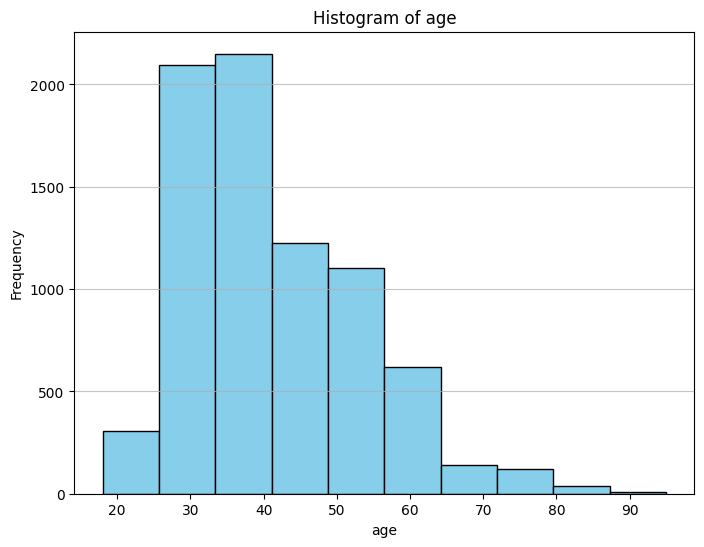

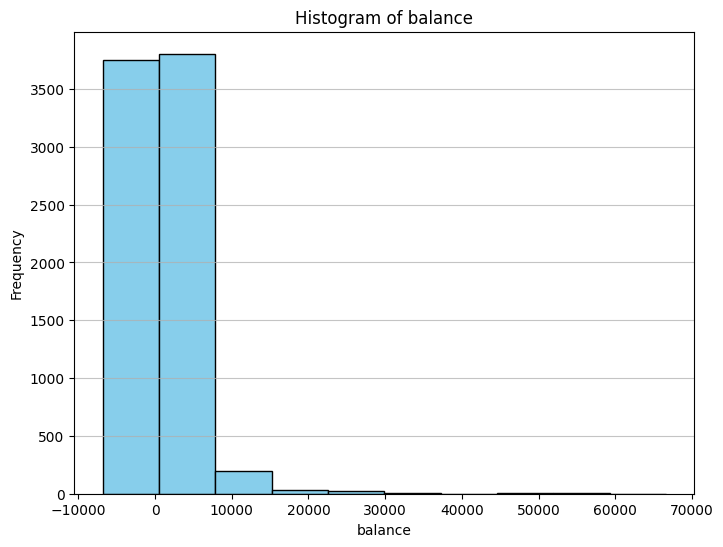

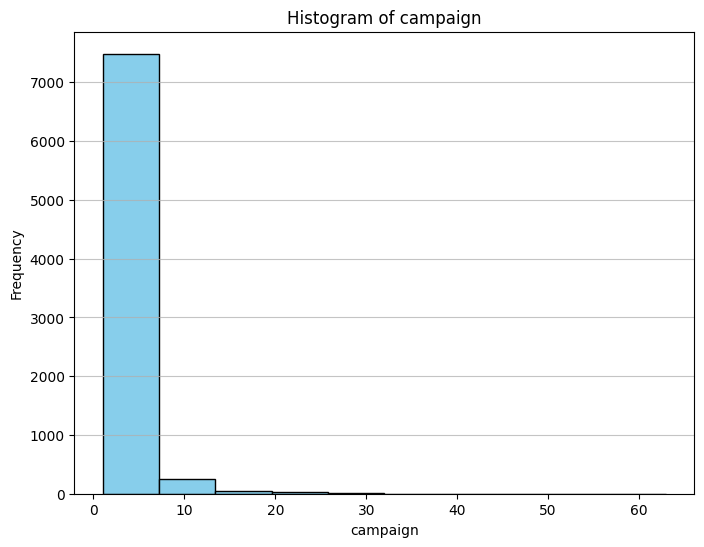

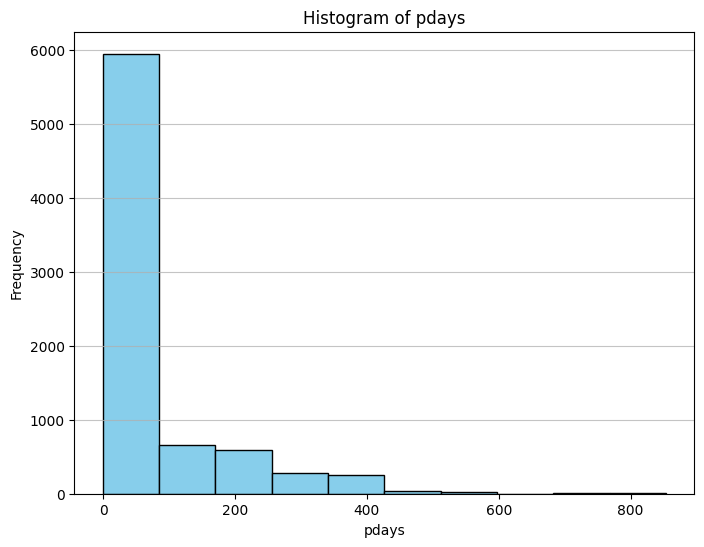

In [9]:
# Creating histograms
columns = ['age', 'balance', 'campaign', 'pdays']  # Numerical columns for histograms
for column in columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

1. Histogram Usia (Age)
Distribusi: Mayoritas nasabah berada dalam rentang usia 30 hingga 40 tahun.

Pola: Terlihat distribusi right-skewed (miring ke kanan), artinya lebih banyak nasabah berusia muda daripada yang tua.

Implikasi: Program atau produk perbankan bisa lebih difokuskan pada usia produktif (30–50 tahun), karena mereka merupakan segmen terbesar.

2. Histogram Saldo (Balance)
Distribusi: Sebagian besar saldo nasabah berkisar antara -10000 hingga 10000, dengan puncaknya mendekati 0.

Outlier: Ada beberapa nasabah dengan saldo sangat tinggi (hingga 60000), tapi jumlahnya sedikit.

Implikasi: Sebagian besar nasabah memiliki saldo rendah hingga menengah. Produk untuk meningkatkan tabungan (seperti program reward) bisa menjadi relevan.

3. Histogram Kampanye (Campaign)
Distribusi: Sebagian besar nasabah hanya dihubungi 1–2 kali selama kampanye marketing.

Pola: Distribusinya sangat miring ke kanan, dengan jumlah nasabah yang dihubungi lebih dari 5 kali sangat kecil.

Implikasi: Upaya kampanye lebih efektif dengan pendekatan awal. Repetisi terlalu banyak tampaknya tidak umum dan mungkin kurang efektif.

4. Histogram Hari Terakhir Kontak (Pdays)
Distribusi: Mayoritas nilai pdays adalah 0, artinya belum pernah dihubungi sebelumnya atau tidak dihubungi dalam kampanye sebelumnya.

Rentang lainnya: Terdapat penurunan tajam setelah nilai 0, artinya hanya sebagian kecil nasabah yang pernah dihubungi dalam jangka waktu tertentu.

Implikasi: Masih banyak peluang untuk menghubungi nasabah baru. Riwayat kontak sebelumnya tampaknya tidak terlalu dominan.

#### Normality Test

In [10]:
from scipy.stats import normaltest

# Apply normaltest to each column and collect the p-values
normality_results = df.select_dtypes(include='number').apply(lambda col: normaltest(col.dropna())[1]).reset_index()

# Rename columns
normality_results.columns = ['Column', 'p-value']

# Print the result
normality_results

,Column,p-value
0,age,6.794232e-179
1,balance,0.000000e+00
2,campaign,0.000000e+00
3,pdays,0.000000e+00


In [11]:
normality_results[normality_results['p-value']<=0.05]['Column'].unique()

array(['age', 'balance', 'campaign', 'pdays'], dtype=object)

Terlihat semua data numerik tidak terdistribusi normal, maka pada model pipeline semua fitur akan dilakukan scaling robust agar model lebih konsisten.

### Kategorical Data

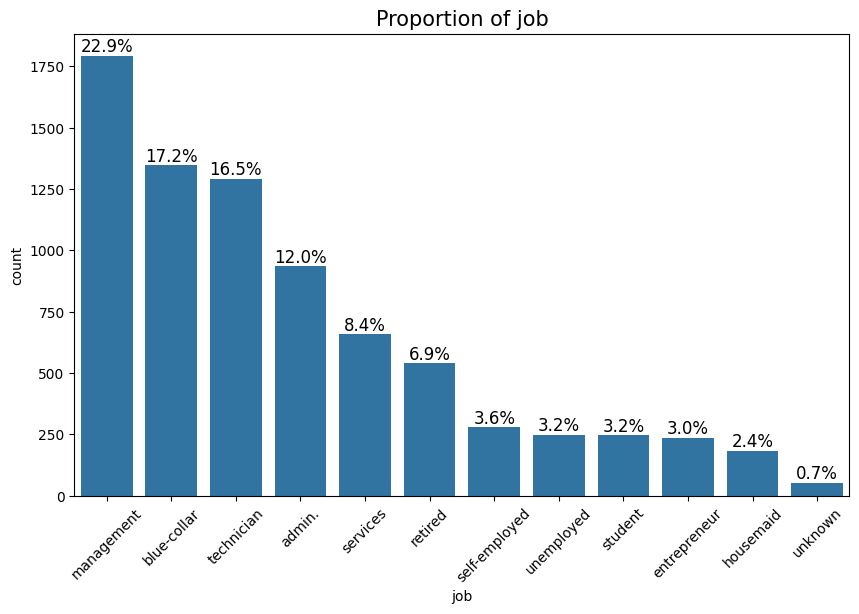

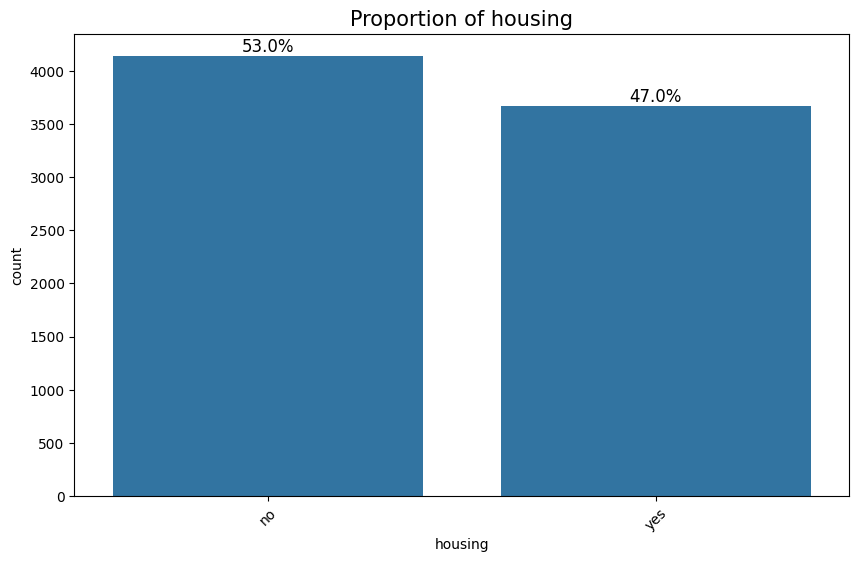

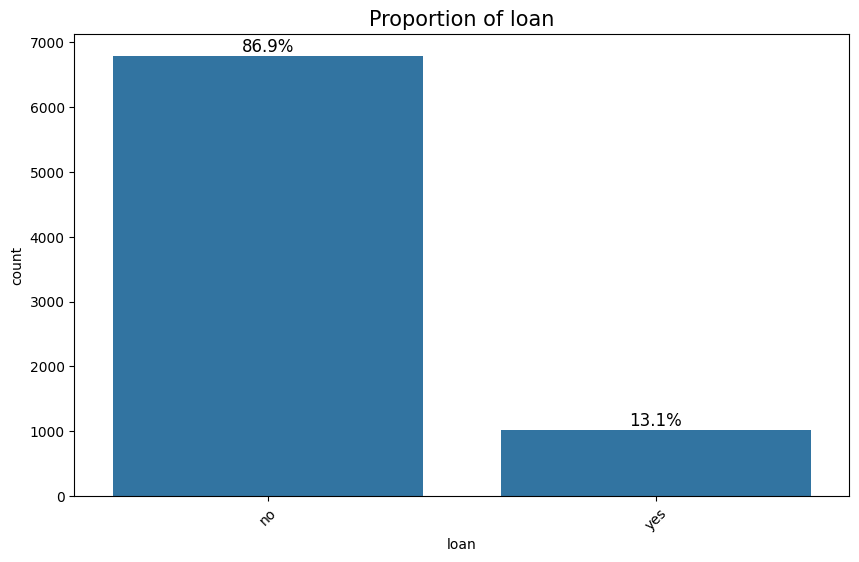

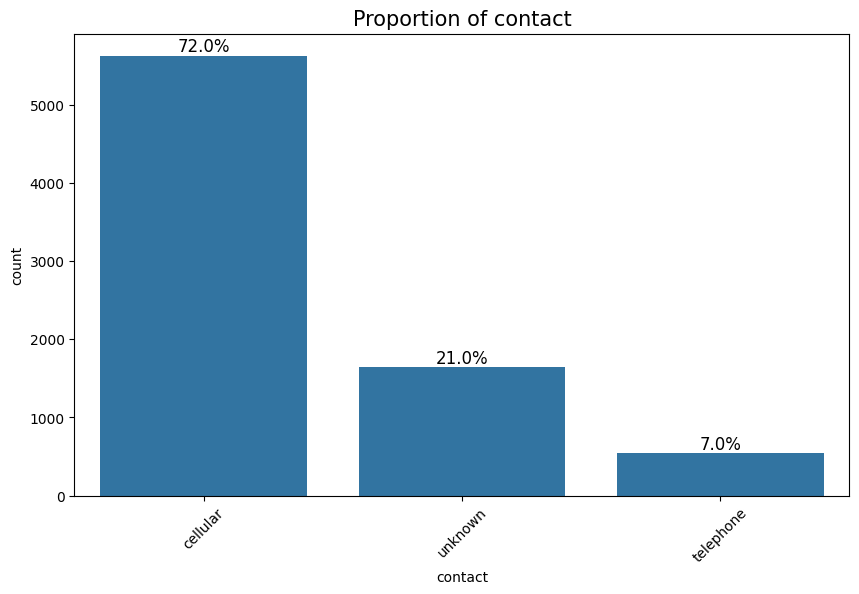

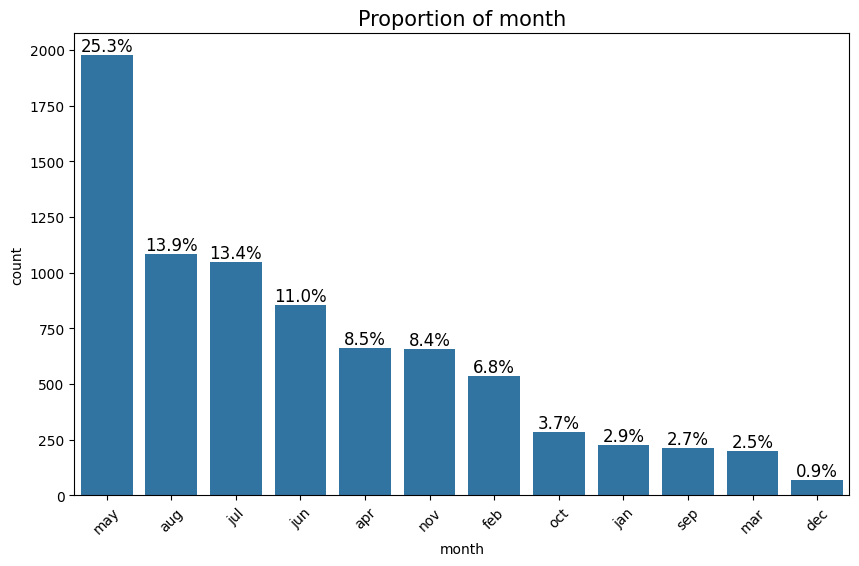

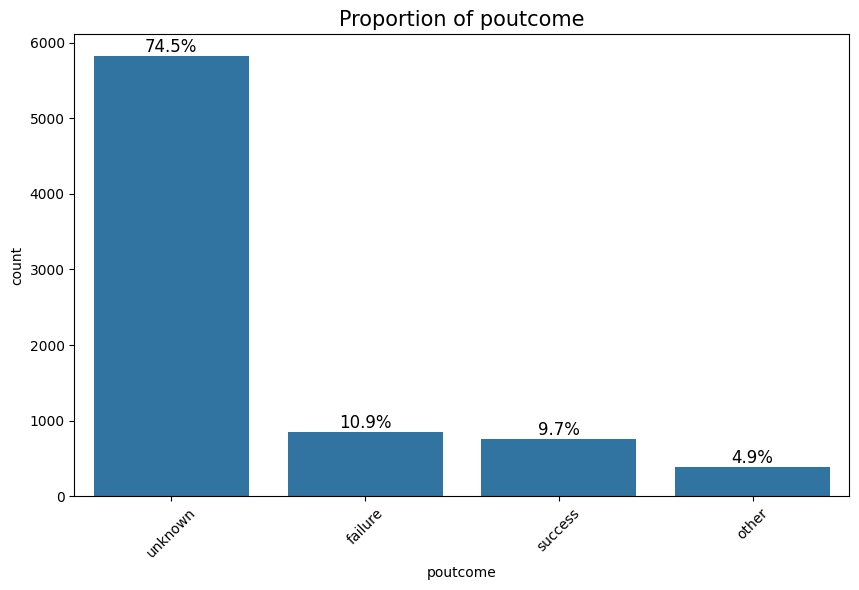

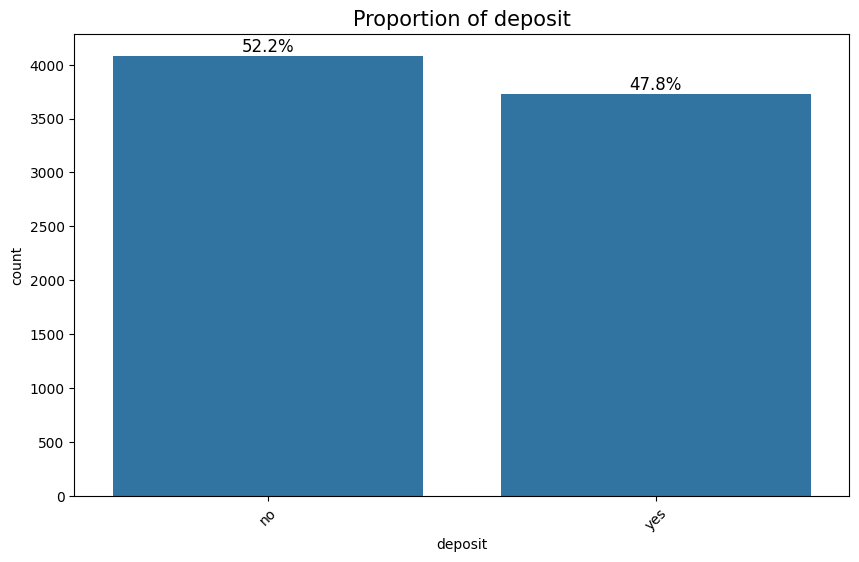

In [12]:
# Loop melalui semua kolom kategorikal
for x in df.select_dtypes(include='object'):
    plt.figure(figsize=(10, 6), dpi=100)

    # Hitung frekuensi nilai dari kolom kategorikal
    count_values = df[x].value_counts(ascending=False)

    # Plot countplot dengan urutan sesuai jumlah kemunculan
    ax = sns.countplot(data=df, x=x, order=count_values.index)

    # Rotasi label sumbu-x agar lebih mudah dibaca
    plt.xticks(rotation=45)

    # Tambahkan judul dengan nama kolom
    plt.title(f"Proportion of {x}", fontsize=15)

    # Hitung nilai relatif dalam persen
    rel_values = count_values.values / len(df) * 100

    # Buat label untuk setiap bar
    lbls = [f'{p:1.1f}%' for p in rel_values]

    # Pastikan jumlah bar dan label sama, lalu tambahkan label di atas bar
    if len(ax.containers[0]) == len(lbls):
        ax.bar_label(container=ax.containers[0], labels=lbls, label_type='edge', fontsize=12)
    else:
        print(f'Warning: number of bars ({len(ax.containers[0])}) and labels ({len(lbls)}) do not match.')

    # Menampilkan plot
    plt.show()


- Job (Pekerjaan): Mayoritas pelanggan bekerja di bidang manajemen (23.5%), diikuti oleh pekerja blue-collar (17.6%) dan teknisi (16.7%). Profesi lain seperti admin, pensiunan, dan layanan publik juga terlihat, namun dengan proporsi yang lebih kecil.

- Housing (Perumahan): Sebagian besar pelanggan tidak memiliki pinjaman perumahan (53.2%), sementara sisanya (46.8%) memiliki pinjaman perumahan.

- Loan (Pinjaman Pribadi): Mayoritas pelanggan tidak memiliki pinjaman pribadi (86.7%), hanya 13.3% pelanggan yang memiliki pinjaman pribadi.

- Contact (Metode Kontak): Sebagian besar pelanggan dihubungi melalui telepon seluler (93.2%), sementara sangat sedikit yang dihubungi melalui telepon rumah (6.8%).

- Month (Bulan Kontak): Bulan dengan jumlah kontak tertinggi adalah bulan Mei (25.5%), diikuti oleh Agustus (13.9%) dan Juli (13.1%). Bulan-bulan seperti September, Maret, dan Desember memiliki jumlah kontak paling sedikit.

= Poutcome (Hasil Kampanye Sebelumnya): Sebagian besar pelanggan memiliki status hasil kampanye yang tidak diketahui karena belum dihubungi sebanyak (74.4%). Sebanyak 11.1% gagal dalam kampanye sebelumnya, dan hanya 9.7% yang sukses sedangkan sisanya sebanyak 4.8% belum memberikan follow up terkait kampanye.

#### Nomality Test

### Deposit (Target)

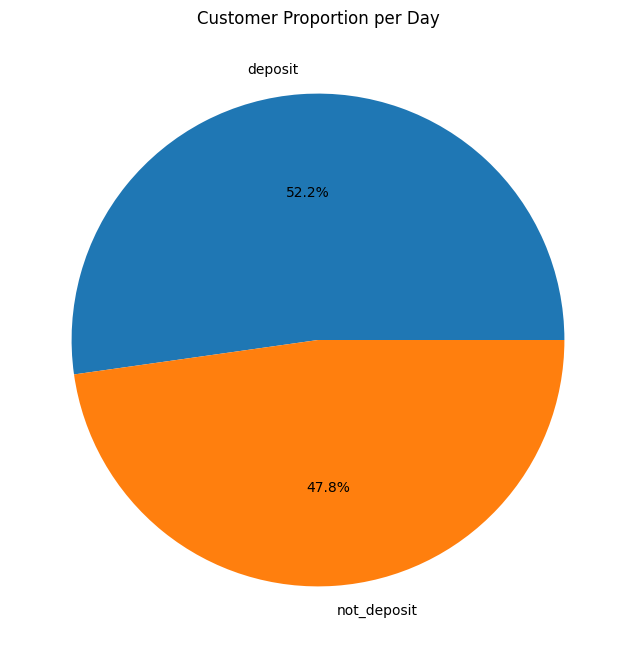

In [13]:
df_agg = df['deposit'].value_counts(normalize=1).reset_index()
df_agg['percentage']=100*df_agg['proportion']
df_agg

plt.figure(figsize=(10, 8))
plt.pie(data=df_agg,x='percentage',labels=['deposit','not_deposit'], autopct='%1.1f%%'
       ,textprops=dict(color="black"))
plt.title('Customer Proportion per Day')
plt.show()

- Dari pie chart ini, kita bisa melihat bahwa 52.2% dari pelanggan telah melakukan deposit (warna biru), sedangkan 47.8% pelanggan tidak melakukan deposit (warna oranye).

- Perbedaan antara keduanya relatif kecil, menunjukkan bahwa jumlah pelanggan yang melakukan deposit dan yang tidak hampir seimbang. Hal ini dapat mengindikasikan bahwa kampanye atau produk deposit yang ditawarkan oleh perusahaan menarik bagi sebagian besar pelanggan, tetapi masih ada hampir setengahnya yang belum melakukan deposit.

#### Deposit (Target) VS Month

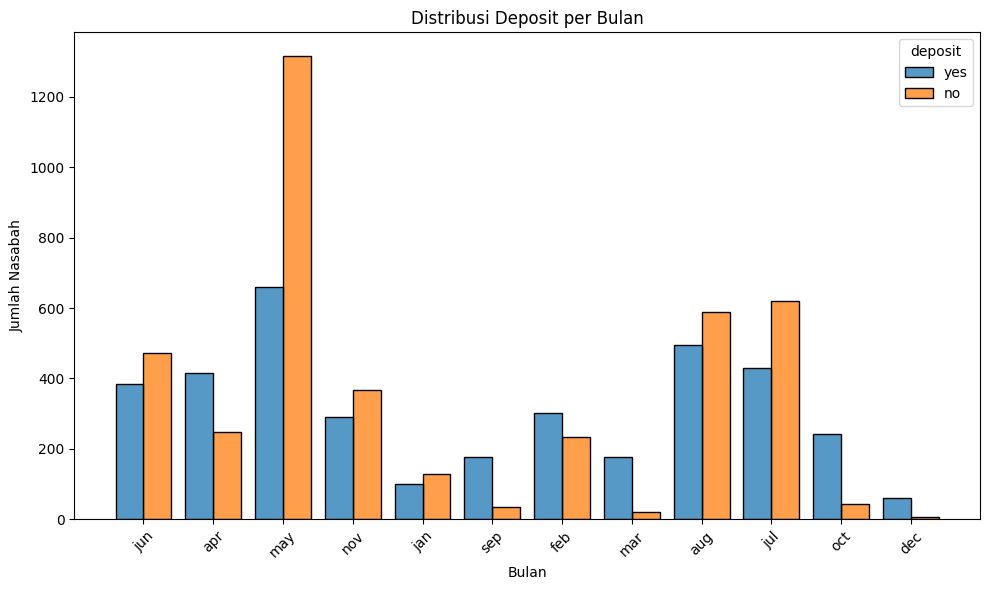

In [14]:
# Buat visualisasi jumlah deposit berdasarkan bulan
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='month', hue='deposit', multiple='dodge', shrink=0.8)

plt.title('Distribusi Deposit per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Nasabah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📆 Distribusi Deposit per Bulan:
Mei (May) menjadi bulan dengan jumlah interaksi tertinggi, namun didominasi oleh nasabah yang tidak membuka deposit (no) – lebih dari 1300 orang.

Bulan Maret (Mar) dan Desember (Dec) menunjukkan aktivitas paling rendah, baik untuk yes maupun no.

Juli (Jul) dan Agustus (Aug) menunjukkan rasio pembukaan deposit (yes) yang cukup tinggi dibanding no, menjadikannya bulan dengan potensi konversi tinggi.

Bulan-bulan seperti Juni (Jun) dan April (Apr) juga aktif, dengan keseimbangan antara yes dan no yang relatif baik.

🧠 Insight Utama:
Mei memiliki volume kontak tinggi namun tingkat keberhasilan rendah, mungkin perlu evaluasi strategi kampanye di bulan ini.

Juli dan Agustus berpotensi besar untuk kampanye karena performa konversi yang lebih baik.

Perlu fokus pada bulan-bulan dengan konversi tinggi, bukan hanya volume interaksi.



In [15]:
# Buat tabel pivot antara deposit dan month
df_deposit_month = df.groupby(['month', 'deposit']).size().unstack().fillna(0).astype(int)
df_deposit_month

deposit,no,yes
month,,
apr,247,415
aug,589,496
dec,8,60
feb,233,301
jan,128,99
jul,621,429
jun,472,385
mar,22,177
may,1317,659


#### Deposit (Target) VS Age

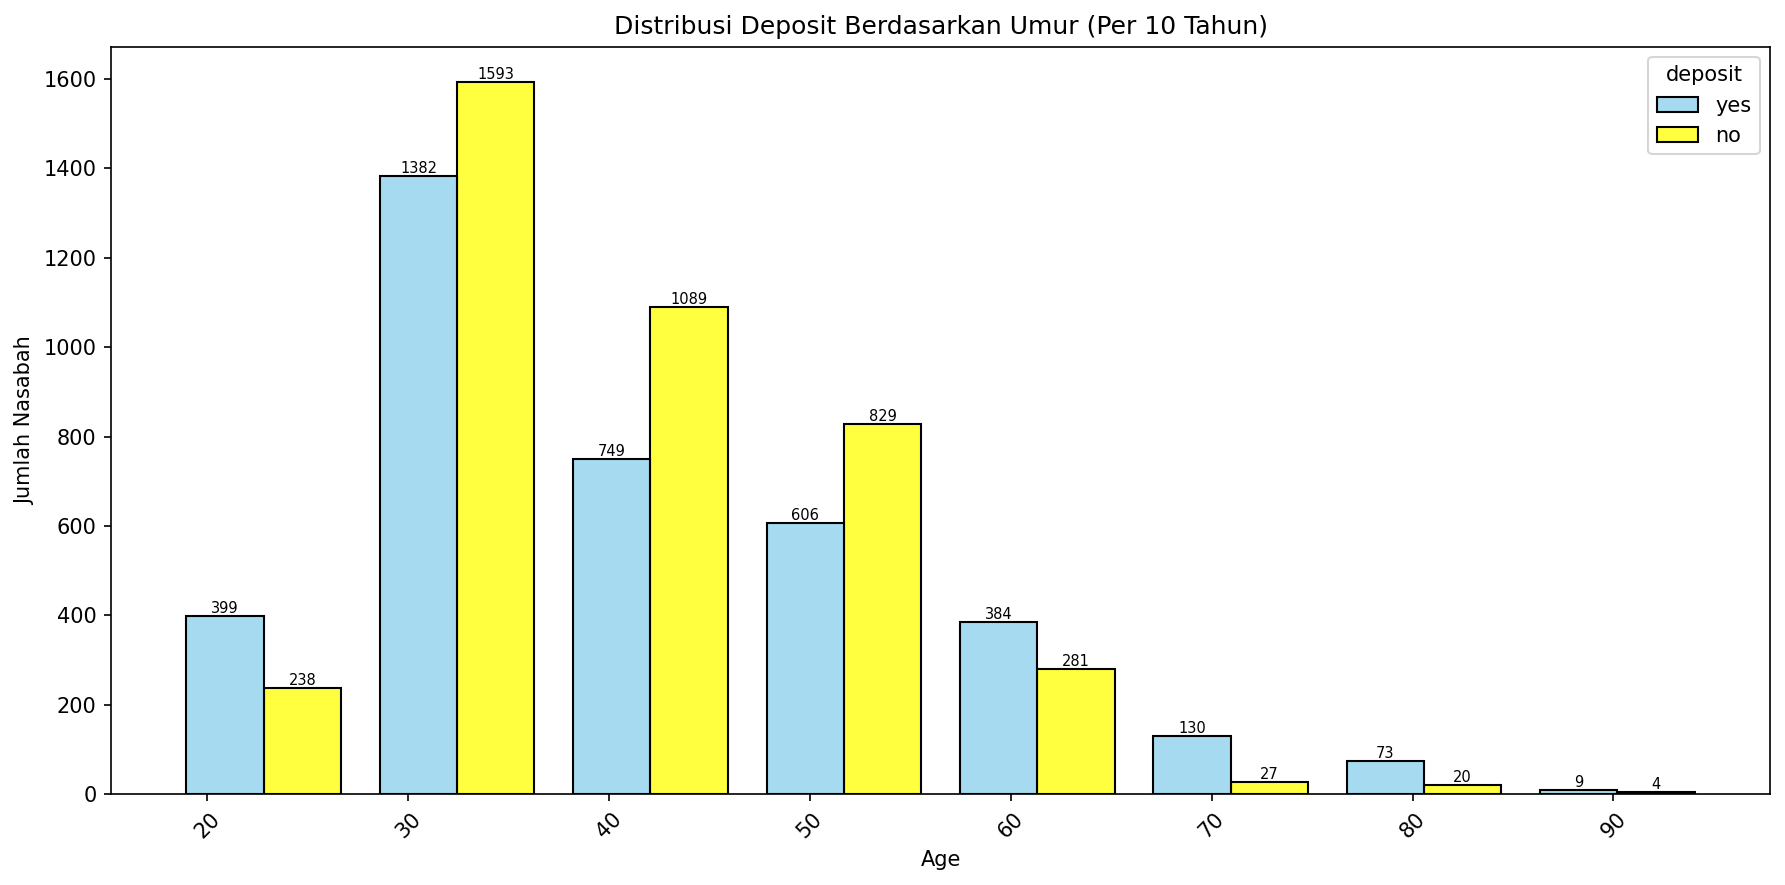

In [16]:
plt.figure(figsize=(12, 6), dpi=150)  # Atur resolusi tinggi
ax = sns.histplot(
    data=df,
    x='age',
    hue='deposit',
    multiple='dodge',
    shrink=0.8,
    binwidth=10,  # Rentang usia per 10 tahun
    palette={'yes': 'skyblue', 'no': 'yellow'}
)

plt.title('Distribusi Deposit Berdasarkan Umur (Per 10 Tahun)')
plt.xlabel('Age')
plt.ylabel('Jumlah Nasabah')
plt.xticks(rotation=45)
plt.tight_layout()

# Tambahkan label pada tiap batang
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=7)

plt.show()

Distribusi Deposit Berdasarkan Umur (Interval 10 Tahun)
Rentang usia 30–40 tahun mendominasi jumlah nasabah, baik yang membuka deposit (yes) maupun tidak (no), dengan puncaknya pada usia 30-an (1593 no, 1382 yes).

Nasabah usia muda (20-an) memiliki tingkat respons cukup tinggi terhadap deposit (399 yes vs 238 no), menandakan potensi yang baik untuk segmen ini.

Mulai usia 40–60 tahun, jumlah nasabah yang tidak membuka deposit tetap tinggi, namun proporsi yes mulai mengejar (yes vs no lebih seimbang di kelompok 60-an).

Usia 70 ke atas menunjukkan penurunan tajam jumlah nasabah, tapi tingkat pembukaan deposit relatif tinggi dibanding jumlah total nasabah di kelompok ini.

~ Insight Utama:
Kelompok usia muda dan paruh baya (20–50 tahun) adalah target utama dalam hal jumlah.

Namun, nasabah usia lebih tua (60–80 tahun) tampak lebih cenderung untuk membuka deposit secara proporsional.

In [17]:
# Buat tabel pivot antara deposit dan month
df_deposit_age = df.groupby(['age', 'deposit']).size().unstack().fillna(0).astype(int)
df_deposit_age.value_counts()

,,count
no,yes,
1,2,3
0,2,2
4,10,2
3,11,2
0,1,2
...,...,...
174,140,1
176,148,1
180,137,1


# Data Preparation

## Data Cleaning

### Missing Value

In [18]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'missing_value': df.isna().sum().values,
    'missing_value(%)': df.isna().mean().values * 100
}).round(2)

,feature,data_type,missing_value,missing_value(%)
0,age,int64,0,0.0
1,job,object,0,0.0
2,balance,int64,0,0.0
3,housing,object,0,0.0
4,loan,object,0,0.0
5,contact,object,0,0.0
6,month,object,0,0.0
7,campaign,int64,0,0.0
8,pdays,int64,0,0.0
9,poutcome,object,0,0.0


## Matrix

<Axes: >

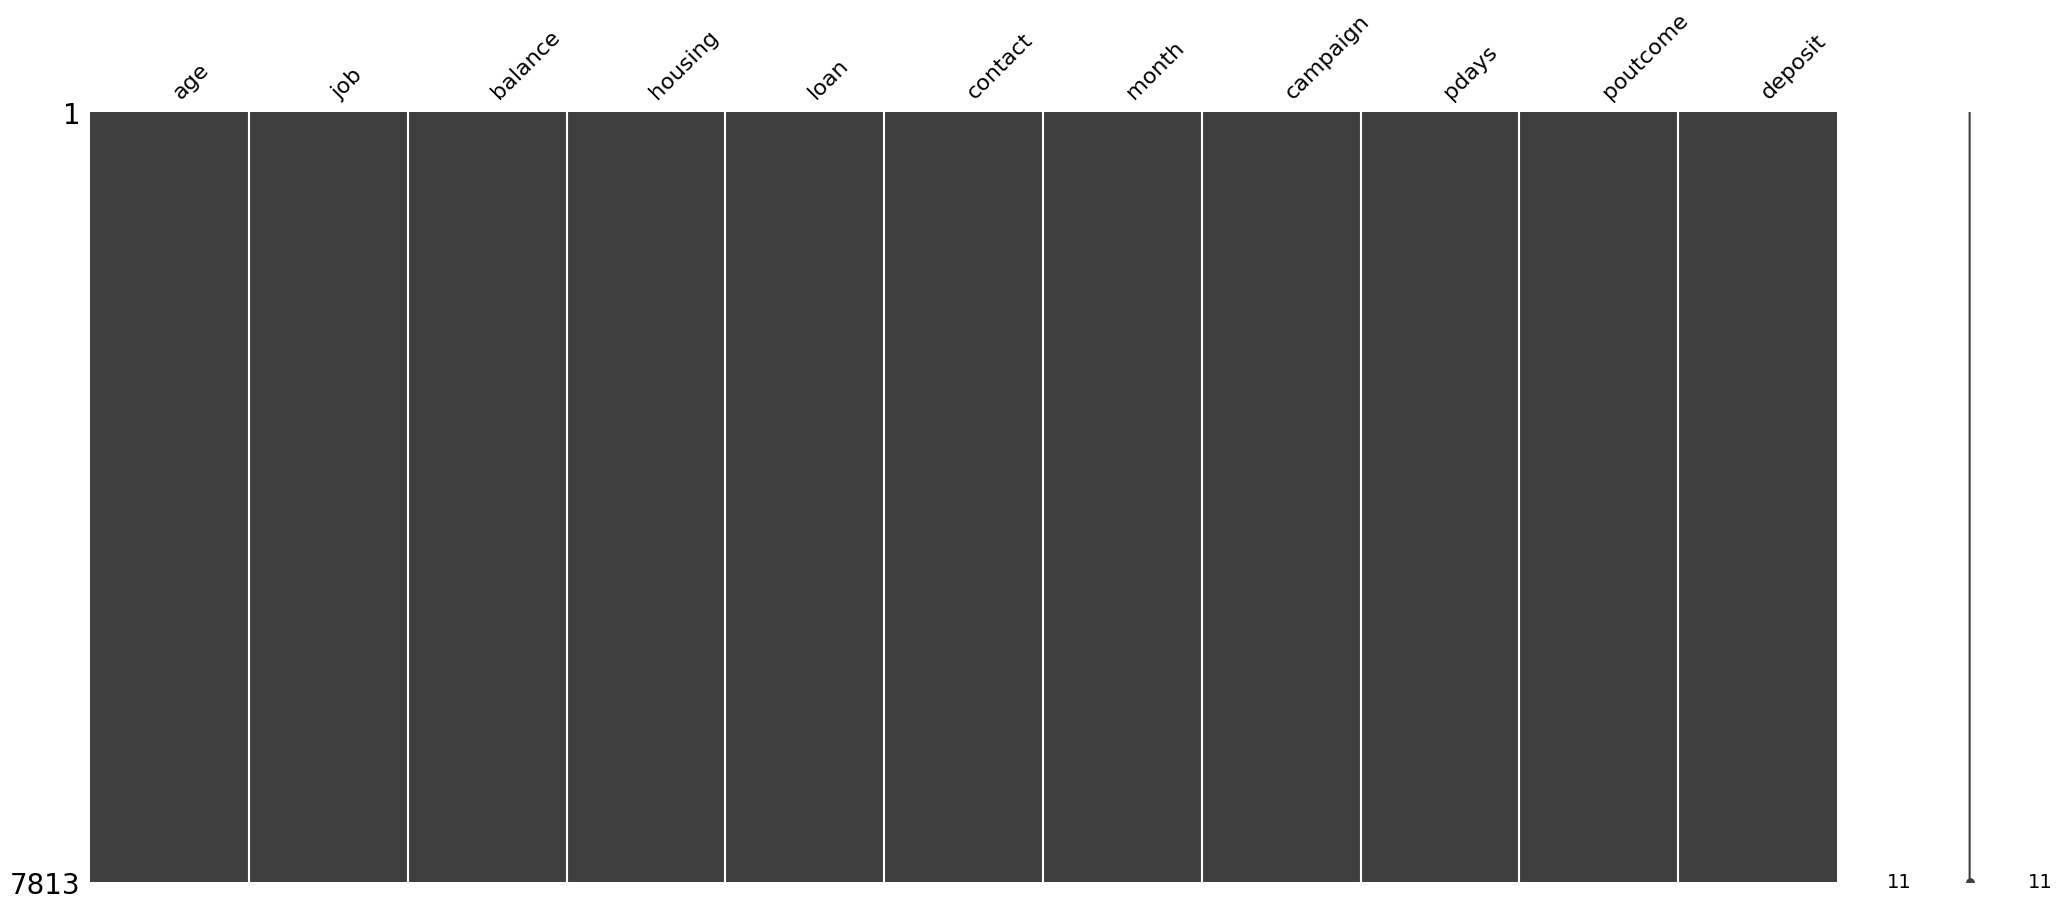

In [19]:
msno.matrix(df)

## Duplicated Data

In [20]:
# Duplicate Check
print(f'Jumlah data duplikat: {df.duplicated().sum()}')

Jumlah data duplikat: 8


### Duplicated Data Handling

In [21]:
df[df.duplicated()]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes


In [22]:
df.drop_duplicates(inplace=True)

Penghapusan data duplikat sangat penting untuk:

Mencegah bias analisis statistik (seperti frekuensi yang terlalu tinggi),

Menjaga integritas dan akurasi model jika digunakan untuk machine learning.

## Numerical Features

### Descriptive Statistics

In [23]:
df.describe()

,age,balance,campaign,pdays
count,7805.000000,7805.000000,7805.000000,7805.000000
mean,41.257783,1513.968225,2.520564,51.462268
std,11.922833,3090.508938,2.728204,108.115084
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,128.000000,1.000000,-1.000000
50%,39.000000,550.000000,2.000000,-1.000000
75%,49.000000,1685.000000,3.000000,41.000000
max,95.000000,66653.000000,63.000000,854.000000


| Kolom        | Interpretasi                                                                                                                                                                                                                                          |
| ------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **age**      | Rata-rata usia adalah **41 tahun**, berkisar antara **18 hingga 95 tahun**. Usia cukup tersebar (std: 11.92), mayoritas di bawah 50 tahun.                                                                                                            |
| **balance**  | Rata-rata saldo adalah **1.514**, namun ada saldo **negatif hingga -6847**, menunjukkan kemungkinan utang atau overdraft. Sebagian besar nasabah memiliki saldo di bawah **1685** (75th percentile), dan outlier sangat besar (**maksimum: 66.653**). |
| **campaign** | Jumlah kontak selama kampanye rata-rata **2.52 kali**, tetapi ada yang dikontak hingga **63 kali**, menunjukkan **potensi outlier atau ketidakseimbangan**.                                                                                           |
| **pdays**    | Nilai **-1** menunjukkan klien belum pernah dihubungi sebelumnya (sangat dominan: median & Q1-Q3 semua -1 atau mendekati). Nilai maksimum **854** menunjukkan jarak hari sejak kontak terakhir sangat bervariasi.                                     |


### Data Distribution

<Figure size 2000x1500 with 0 Axes>

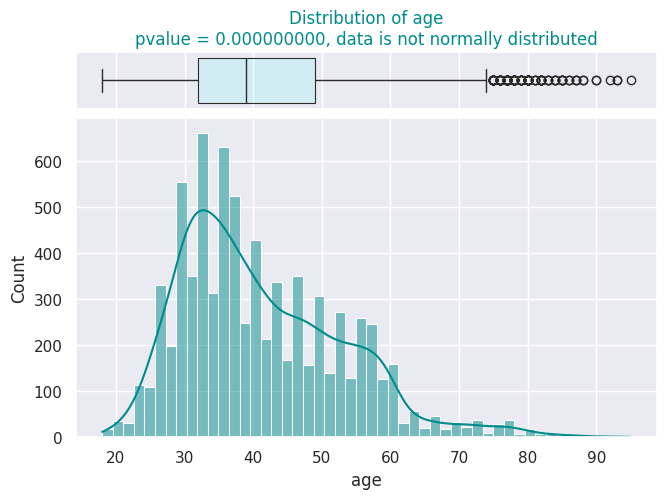

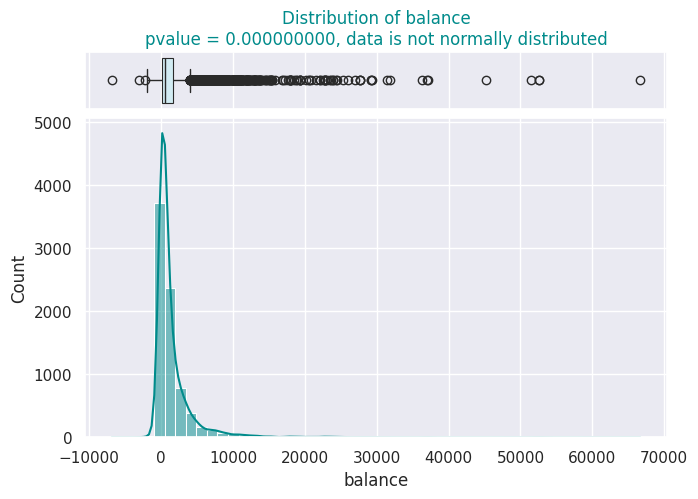

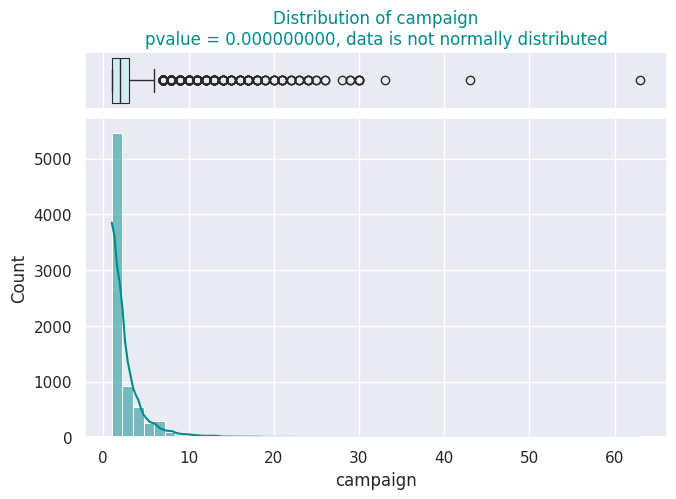

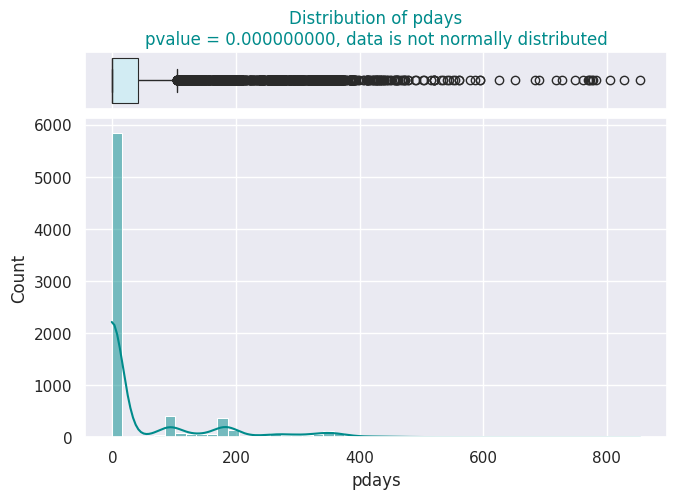

In [24]:
# Set the seaborn style to dark with a custom color palette
sns.set_theme(style="darkgrid", palette="dark:#008b8b")  # Dark cyan color

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Plot the distribution of numerical data in the dataset along with hypothesis testing using normaltest
plt.figure(figsize=(20,15))

for column in numerical_columns:

    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(7.5,5),
                                    gridspec_kw={"height_ratios": (.15, .85), "hspace": 0.05})

    # Perform normality test (normaltest)
    stat, pvalue = normaltest(df[column].dropna())

    # Determine normality based on p-value
    if pvalue > 0.05:
        distribution = f'pvalue = {pvalue:.9f}, data is normally distributed'
    else:
        distribution = f'pvalue = {pvalue:.9f}, data is not normally distributed'

    # Set title with result of normality test
    ax1.set_title(f"Distribution of {column}\n{distribution}", color="darkcyan")

    # Boxplot for the column with transparent background
    sns.boxplot(x=df[column], ax=ax1, color="darkcyan",
                boxprops=dict(facecolor=(0, 1, 1, 0.1), linewidth=0.8))  # Transparent boxplot
    ax1.set(xlabel="")

    # Histogram and KDE for the column
    sns.histplot(df[column], ax=ax2, stat="count", kde=True, bins=50, color="darkcyan")

# Show all plots after finishing the loop
plt.show()

#### Outliers Handling

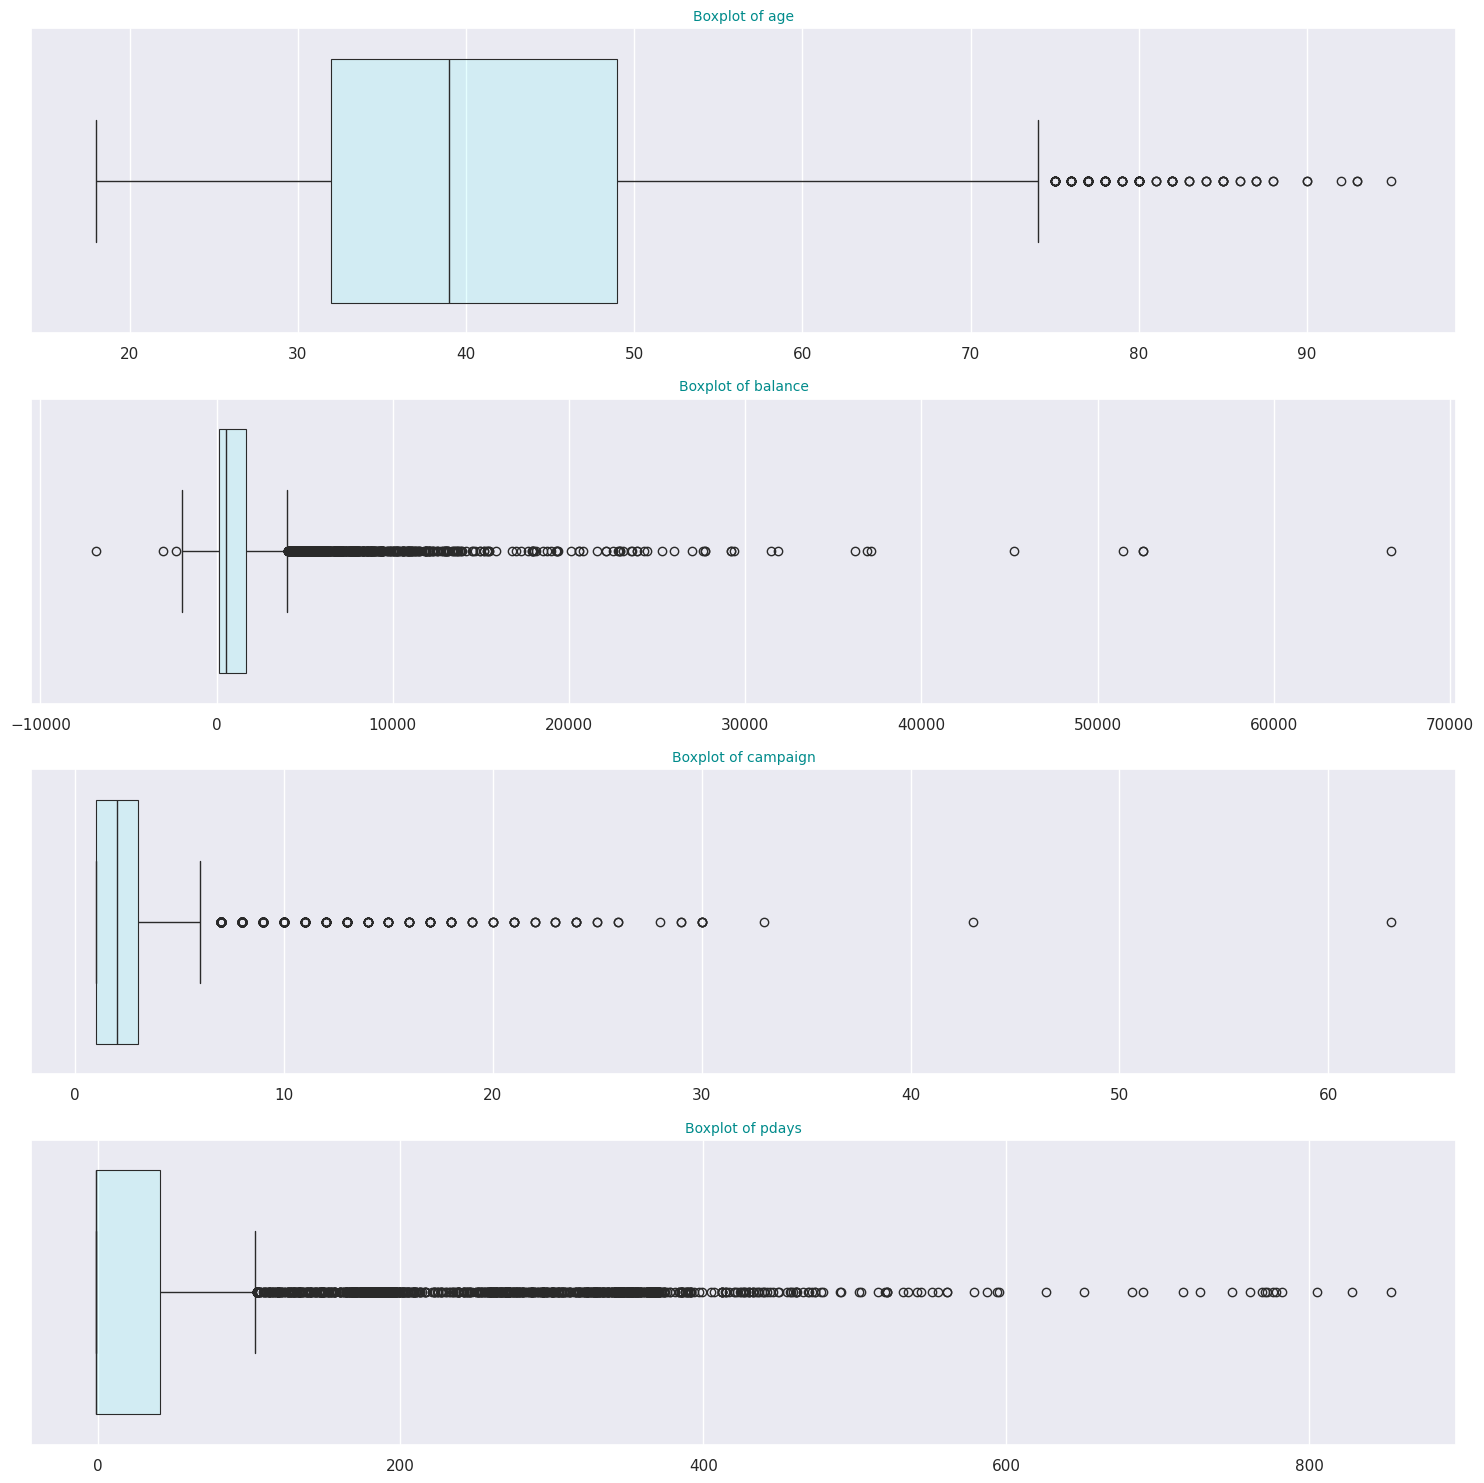

In [25]:
# Set the seaborn style to dark with a custom color palette
sns.set_theme(style="darkgrid", palette="dark:#008b8b")  # Dark cyan color

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Plot the boxplot of numerical data in the dataset
plt.figure(figsize=(15, 15))

# Iterate through numerical columns and plot
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(len(numerical_columns), 1, i)  # Arrange plots in a single column
    sns.boxplot(x=df[column], color="darkcyan",
                boxprops=dict(facecolor=(0, 1, 1, 0.1), linewidth=0.8))  # Transparent boxplot
    plt.title(f"Boxplot of {column}", fontsize=10, color="darkcyan")
    plt.xlabel("")  # Remove x-label to save space
    plt.tight_layout()  # Adjust layout to avoid overlapping

# Show all plots after finishing the loop
plt.show()


#### IQR

In [26]:
#memeriksa outlier dengan menghitung IQR pada dataset (dengan IQR 3)
columns = ["age","balance","campaign","pdays"]
list_Q1 = []
list_Q3 = []
iqr_list= []
list_l_bound = []
list_u_bound = []
length_list = []
percentage_n_list =[]

for col in columns:
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    u_bound = Q3 + 3*IQR #IQR 3x
    l_bound = Q1 - 3*IQR #IQR 3x
    length = len(df[(df[col] < l_bound) | (df[col] > u_bound) ])
    percentage_n = round(length/len(df),2)
    list_Q1.append(Q1)
    list_Q3.append(Q3)
    iqr_list.append(IQR)
    list_l_bound.append(l_bound)
    list_u_bound.append(u_bound)
    length_list.append(length)
    percentage_n_list.append(percentage_n)
iqr = pd.DataFrame({
    "columns":columns,
    "Q1":list_Q1,
    "Q3":list_Q3,
    "IQR":iqr_list,
    "Lower Bound":list_l_bound,
    "Upper Bound":list_u_bound,
    "n": length_list,
    "n(%)": percentage_n_list
})

df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


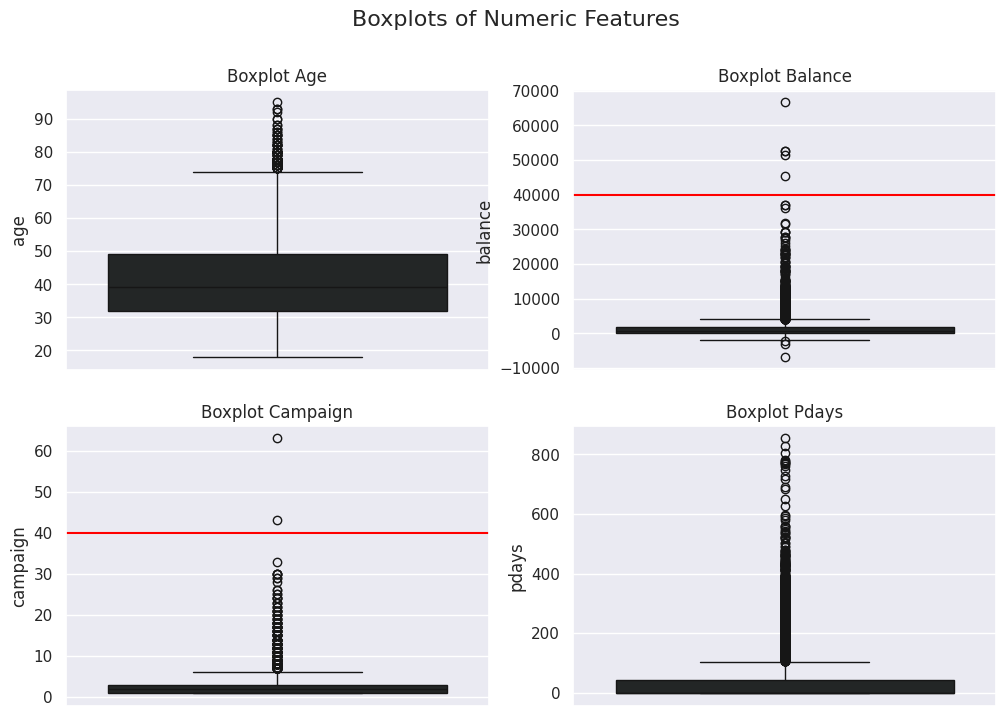

In [27]:
#Menandai data outlier pada dataset yang akan dihapus
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.boxplot(df["age"])
plt.title("Boxplot Age")

plt.subplot(2,2,2)
sns.boxplot(df["balance"])
plt.axhline(40000,c='r')
plt.title("Boxplot Balance")

plt.subplot(2,2,3)
sns.boxplot(df["campaign"])
plt.axhline(40,c='r')
plt.title("Boxplot Campaign")

plt.subplot(2,2,4)
sns.boxplot(df["pdays"])
plt.title("Boxplot Pdays")

plt.suptitle("Boxplots of Numeric Features", fontsize=16)

plt.show()

1. Balance (Saldo Nasabah)
Garis merah di sekitar 40.000, menunjukkan batas atas saldo yang dianggap wajar.

Outlier: Banyak nasabah memiliki saldo ekstrem (di atas 40.000), bahkan hingga 70.000.

Tindakan: Menghapus outlier ini akan membantu mengurangi pengaruh ekstrem pada model, sehingga model tidak bias terhadap nasabah sangat kaya.

Dampak Bisnis: Model akan lebih merepresentasikan mayoritas nasabah, bukan hanya nasabah high net-worth.

2. Campaign (Jumlah Kontak dalam Kampanye)
Garis merah di angka 40, berarti interaksi lebih dari 40 kali dianggap berlebihan.

Outlier: Beberapa nasabah dihubungi hingga lebih dari 60 kali, yang tidak realistis atau bisa menunjukkan data noise.

Tindakan: Menghapus baris ini akan membuat model lebih stabil dan tidak ‘belajar’ dari kasus ekstrem yang bisa jadi tidak efektif.

Dampak Bisnis: Menghindari bias terhadap kampanye yang over-saturasi, agar model merekomendasikan jumlah kontak yang lebih masuk akal.


In [28]:
#drop all outlier pada dataset
df = df[df["campaign"]<40]
df = df[df["balance"]<40000]

df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


### Correlation Matrix

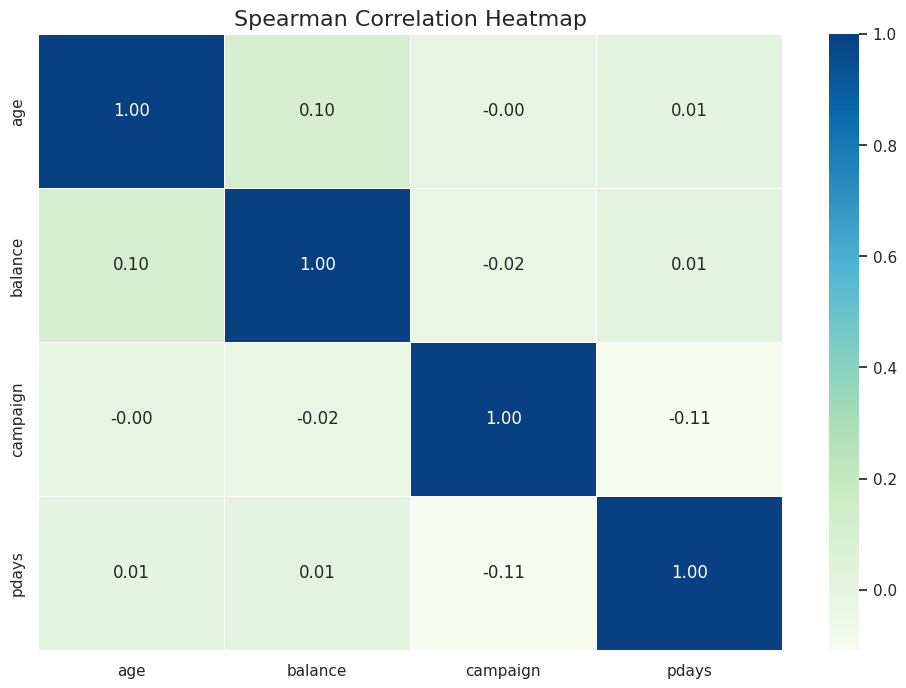

In [29]:
# create correlation heatmap numeric
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='GnBu', fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap", fontsize=16)
plt.show()

Umum: Semua korelasi antar fitur numerik sangat lemah (mendekati 0), menunjukkan bahwa fitur-fitur ini saling tidak memiliki hubungan monotonic yang kuat.

📈 Korelasi antar variabel:
age vs balance: 0.10 → korelasi positif sangat lemah.

campaign vs pdays: -0.11 → korelasi negatif sangat lemah.

Hubungan lainnya berada di sekitar -0.02 sampai 0.01, artinya hampir tidak ada hubungan sama sekali.

✅ Kesimpulan:
Tidak ada multikolinearitas yang perlu dikhawatirkan di antara fitur numerik ini.

Masing-masing fitur menyimpan informasi unik yang bisa tetap dipertimbangkan dalam modeling.

Pemilihan Spearman cocok karena bisa menangkap hubungan non-linear monotonic (jika ada).

### Deposit Distribution

In [30]:
# ubah ke numerik label
df['deposit'] = df['deposit'].map({'yes': 0, 'no': 1})
df.deposit.value_counts(normalize=True)

,proportion
deposit,
1,0.522057
0,0.477943


,n_deposit,count
0,1,4071
1,0,3727


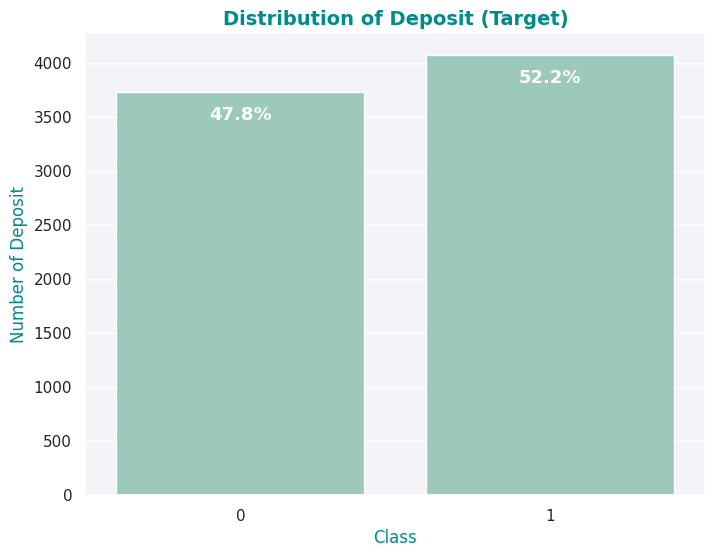

In [31]:
# Set theme dan palette untuk visualisasi
sns.set_theme(style='darkgrid', palette='GnBu_d')

plt.figure(figsize=(8, 6))
total = len(df)
ax = sns.countplot(data=df, x='deposit')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100 * p.get_height() / total),
                (p.get_x() + 0.4, p.get_height() - 125),
                ha='center', va='top', color='white',
                size=13, weight='bold')
plt.title('Distribution of Deposit (Target)', size=14, weight='bold', color='darkcyan')
ax.set_xlabel('Class', color='darkcyan')
ax.set_ylabel('Number of Deposit', color='darkcyan')

# Membuat background transparan
plt.gca().patch.set_alpha(0.5)  # Membuat axes transparan
plt.gcf().set_facecolor('none')  # Membuat figur transparan

# Menghitung jumlah churn
n_deposit = pd.DataFrame(df['deposit'].value_counts()).reset_index().rename(columns={'index': 'class', 'deposit': 'n_deposit'})
n_deposit

Dataset ini memiliki distribusi target yang cukup seimbang, hanya berbeda sekitar 4.4% antar kelas.

Tidak diperlukan teknik penyeimbangan data (seperti SMOTE atau undersampling) untuk tahap modeling, karena ketidakseimbangan tidak signifikan.

### Multicollinearity with VIF

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# buat function
def calc_vif(x):
    # dataframe kosong
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    # menghitung vig untuk setiap kolom nya
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [33]:
from statsmodels.tools.tools import add_constant

# Function to calculate VIF for each feature in a dataset
def calc_vif(df):
    # Select only numeric columns
    df = df.select_dtypes(include=[np.number])

    # Replace infinite values with NaN, then drop rows with any NaN values
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

    # Add constant to the dataset (for the intercept)
    x = add_constant(df)  # Adds constant column

    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data['variables'] = x.columns
    vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    # Exclude the constant column from the results
    vif_data = vif_data[vif_data['variables'] != 'const']

    return vif_data

# Example of usage
vif_results = calc_vif(df.drop(columns='deposit'))
vif_results_sorted = vif_results.sort_values(by='VIF', ascending=False)
vif_results_sorted


,variables,VIF
3,campaign,1.011990
4,pdays,1.011966
2,balance,1.010057
1,age,1.009692


Semua nilai VIF berada sangat dekat dengan 1, yang menunjukkan bahwa tidak ada multikolinearitas yang signifikan di antara variabel-variabel tersebut. Ini berarti setiap variabel independen tidak memiliki korelasi linear yang tinggi dengan variabel independen lainnya dalam model.

## Categorical Features

### Descriptive Statistics

In [34]:
df.describe(include = 'object')

,job,housing,loan,contact,month,poutcome
count,7798,7798,7798,7798,7798,7798
unique,12,2,2,3,12,4
top,management,no,no,cellular,may,unknown
freq,1788,4132,6775,5619,1971,5805


### Unique Values

In [35]:
kategorik = df.select_dtypes(include = 'object')
kategorik.nunique()

,0
job,12
housing,2
loan,2
contact,3
month,12
poutcome,4


### Data Distribution

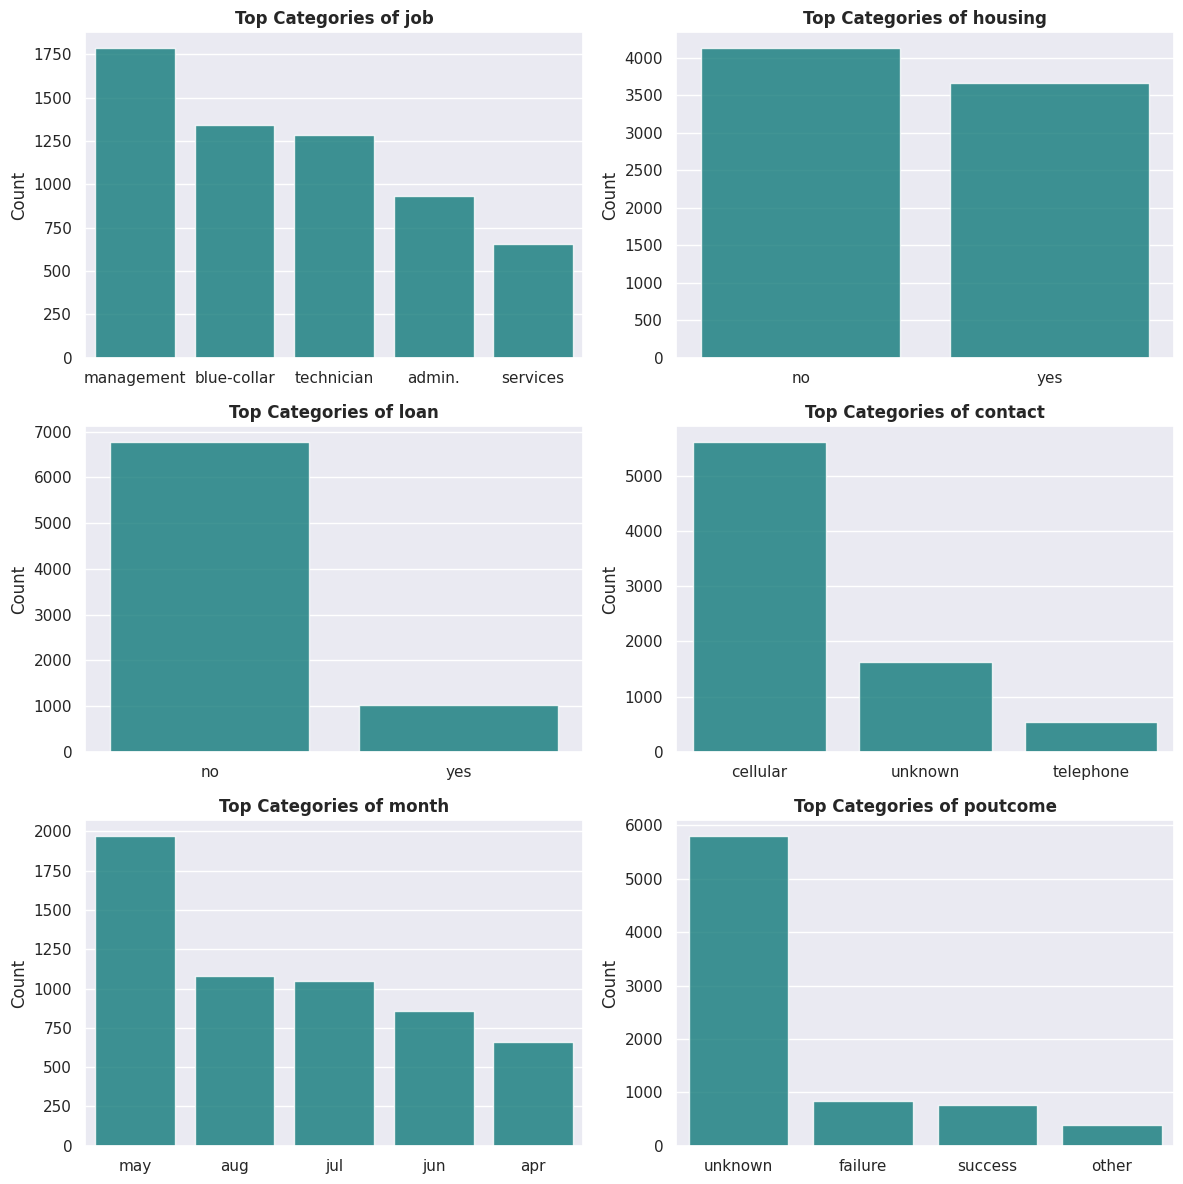

In [36]:
# Jumlah kategori
num_columns = len(kategorik.columns)
rows = (num_columns // 2) + (num_columns % 2)  # Menentukan jumlah baris (max 2 kolom per baris)

fig, axes = plt.subplots(rows, 2, figsize=(12, rows * 4))  # Buat subplot grid fleksibel
axes = axes.flatten()  # Flatten untuk indexing yang mudah

# Looping untuk setiap kolom kategorik
for i, setiap_kolom in enumerate(kategorik.columns):
    category_counts = df[setiap_kolom].value_counts().head(5)  # Ambil top 5 kategori

    sns.barplot(x=category_counts.index, y=category_counts.values,
                color="darkcyan", alpha=0.8, ax=axes[i])  # Gunakan axes[i]

    axes[i].set_title(f"Top Categories of {setiap_kolom}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


1. Job
Kategori pekerjaan terbanyak:

Management paling dominan, diikuti oleh blue-collar dan technician.

Kategori services dan admin. memiliki jumlah yang lebih rendah.

Interpretasi: Data didominasi oleh pekerjaan yang berhubungan dengan manajemen dan pekerjaan fisik.

2. Housing
Sebagian besar responden tidak memiliki pinjaman perumahan, meskipun yang memiliki juga cukup banyak.

Interpretasi: Ada distribusi yang cukup seimbang antara pemilik dan non-pemilik pinjaman perumahan, namun mayoritas adalah tidak memiliki.

3. Loan
Mayoritas besar responden tidak memiliki pinjaman pribadi.

Interpretasi: Karakteristik finansial responden cenderung bebas dari pinjaman pribadi.

4. Contact
Mayoritas kontak dilakukan melalui cellular, jauh lebih banyak daripada telephone dan unknown.

Interpretasi: Metode komunikasi utama dalam data ini adalah melalui ponsel.

5. Month
Bulan Mei (May) memiliki jumlah kontak terbanyak, diikuti oleh Agustus (Aug) dan Juli (Jul).

Interpretasi: Aktivitas pemasaran atau kampanye paling intens dilakukan di bulan Mei.

6. Poutcome (hasil kampanye pemasaran sebelumnya)
Mayoritas hasil sebelumnya adalah unknown, artinya sebagian besar klien belum pernah dihubungi sebelumnya atau hasilnya tidak tercatat.

Di antara hasil yang diketahui, failure dan success cukup seimbang, meskipun jumlahnya jauh lebih kecil.

Interpretasi: Data memiliki keterbatasan historis, dengan hasil kampanye sebelumnya tidak tersedia untuk sebagian besar kasus.

# Feature Engineering

## Data Preparation

### Binning

#### Binning Age

In [37]:
# Umur bisa dikategorikan, karena risiko sering kali berubah tergantung umur
# misalnya diubah ke 4 bin dengan labelnya, ingat seharusnya ini indikasi ordinal
df['age_group'] = pd.qcut(df['age'], q=4, labels=['young', 'adult', 'middle_age', 'senior'])

In [38]:
# drop kolom age
df.drop(columns=['age'], inplace=True)

### Dataset Splitting

In [39]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['deposit'])
y = df['deposit']  # Kolom target

# Split dataset menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6238, 10), (1560, 10), (6238,), (1560,))

### Encoder

In [41]:
# untuk menggunakan feature selection, kolom kategori perlu diubah ke numerik dulu kita akan gunakan label encoder
cat_column = ['job','housing','loan','contact','month','poutcome','age_group']

# fit transform kolom menggunakan label encoder
for col in cat_column:
  encoder = LabelEncoder()
  X_train[col] = encoder.fit_transform(X_train[col])
  X_test[col] = encoder.transform(X_test[col])

# Check data types after transformation
print(X_train.dtypes)
print(X_test.dtypes)

job          int64
balance      int64
housing      int64
loan         int64
contact      int64
month        int64
campaign     int64
pdays        int64
poutcome     int64
age_group    int64
dtype: object
job          int64
balance      int64
housing      int64
loan         int64
contact      int64
month        int64
campaign     int64
pdays        int64
poutcome     int64
age_group    int64
dtype: object


### Preprocessing

In [42]:
def num_pipe(impute='median', poly=None, scaling=None, n_neighbors=5,
             max_iter=10, weights="uniform"):

  # pastikan parameter diatas diinput dengan benar
  if impute not in ['knn', 'mean', 'median', 'iterative', None]:
    raise Exception("impute only supports {'knn', 'mean', 'median', None}")
  if scaling not in ['standard', 'minmax', 'robust', 'maxabs', 'normalize', None]:
    raise Exception("scaling only supports {'standard', 'minmax', 'robust', 'maxabs', 'normalize'}")
  if (type(poly) is not int) and (poly is not None):
    raise Exception("poly should be int or None")

  # define imputer
  if impute is None:
    steps = []
  elif impute == "knn":
    steps = [('imputer', KNNImputer(n_neighbors=n_neighbors, weights=weights))]
  elif impute == "iterative":
    steps = [('imputer', IterativeImputer(max_iter=max_iter, random_state=0))]
  elif impute == "constant":
    steps = [('imputer', SimpleImputer(strategy=impute, fill_value="no_info"))]
  else:
    steps = [('imputer', SimpleImputer(strategy=impute))]

  # define poly jika digunakan
  if poly is not None:
    steps.append(('poly', PolynomialFeatures(poly)))

  # define scaling jika digunakan
  if scaling == 'standard':
    steps.append(('scaler', StandardScaler()))
  elif scaling == 'minmax':
    steps.append(('scaler', MinMaxScaler()))
  elif scaling == 'robust':
    steps.append(('scaler', RobustScaler()))

  return Pipeline(steps)

def cat_pipe(impute='most_frequent', encoder='onehot'):
  if impute not in ['most_frequent', 'constant', None]:
    raise Exception("impute only supports {'most_frequent', None}")
  if encoder not in ['onehot', 'ordinal', 'binary', None]:
    raise Exception("encoder should be boolean {'onehot', 'ordinal', 'binary', None}")

  if impute is None:
    steps = []
  else:
    steps = [('imputer', SimpleImputer(strategy=impute))]

  if encoder is not None:
    if encoder == 'onehot':
      steps.append(('onehot', OneHotEncoder(handle_unknown='ignore')))
    elif encoder == 'ordinal':
      steps.append(('ordinal', OrdinalEncoder()))
    elif encoder == 'binary':
      steps.append(('binary', BinaryEncoder()))

  return Pipeline(steps)

In [43]:
numeric_cols = ["balance", "campaign", "pdays"]
one_hot_cols = ["job", "contact", "month", "poutcome"]
ordinal_cols = ["age_group"]
binary_cols = ["housing", "loan"]

# Pipeline kategorik untuk one-hot dan ordinal encoding
numeric_pipeline = num_pipe(scaling="minmax")
onehot_pipeline = cat_pipe(encoder="onehot")
ordinal_pipeline = cat_pipe(encoder='ordinal')
binary_pipeline = cat_pipe(encoder="binary")

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_cols),
    ('onehot_cat', onehot_pipeline, one_hot_cols),
    ('ordinal_cat', ordinal_pipeline, ordinal_cols),
    ('binary_cat', binary_pipeline, binary_cols)
])

Kode ini bertujuan untuk mempersiapkan preprocessing data dengan membedakan jenis kolom (numerik, kategorikal) dan menerapkan pipeline transformasi berbeda sesuai jenis datanya. Juga disiapkan eksperimen imputasi data.



In [44]:
# Identifikasi kolom numerik dan kategorikal
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Experiment 1 - Iterative Imputer
transformer1 = ColumnTransformer([
    ('imp_iter', IterativeImputer(),["balance", "campaign", "pdays", "age_group","job","contact","month","poutcome","housing","loan"]),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_features),
], remainder='passthrough')

## Modelling

### Experiment 1 - Based Model

In [45]:
# Individual Models
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
lgbm = lgb.LGBMClassifier(verbose=-1,objective='binary', random_state=42)


# Voting Classifier - Hard Voting
vc_hard = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('dt', dt),
        ('xgb', xgb)
    ],
    voting='hard'
)

# Voting Classifier - Soft Voting
vc_soft = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('dt', dt),
        ('xgb', xgb)
    ],
    voting='soft'
)

# Stacking Classifier
base_model = [
    ('lr', lr),
    ('dt', dt),
    ('xgb', xgb)
]
meta_model = LogisticRegression()  # Meta model for stacking
stacking = StackingClassifier(estimators=base_model, final_estimator=meta_model)

In [46]:
# Scalers
robust = RobustScaler()
minmax = MinMaxScaler()
standard = StandardScaler()

#### Based Model with Iterative Imputer

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

In [48]:
# Definisi custom scorer untuk F2-score
f2_scorer = make_scorer(fbeta_score, beta=2)

models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'K-Nearest Neighbors': knn,
    'Voting Classifier (Hard)': vc_hard,
    'Voting Classifier (Soft)': vc_soft,
    'Stacking': stacking,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'XGBoost': xgb,
    'LightGBM': lgbm
}

results = []

# K-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f'Model: {model_name} processing...')

    # Pipeline
    # Apply ColumnTransformer before scaling and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor), # Using preprocessor that already defined
        ('scaler', RobustScaler(with_centering=False)), # Set with_centering=False for RobustScaler
        ('model', model)
    ])

    # Perform cross-validation with F2-score, recall, and precision
    # Set error_score='raise' to get more detailed error messages if needed
    scores = cross_validate(pipeline, X_train, y_train, cv=cv,
                            scoring={'f2': f2_scorer, 'recall': 'recall', 'precision': 'precision'},
                            error_score='raise')

    # Store results
    results.append({
        'Model': model_name,
        'Mean F2 Score': np.mean(scores['test_f2']),
        'Mean Recall': np.mean(scores['test_recall']),
        'Mean Precision': np.mean(scores['test_precision']),
        'Std F2 Score': np.std(scores['test_f2']),
        'Std Recall': np.std(scores['test_recall']),
        'Std Precision': np.std(scores['test_precision'])
    })

# Convert to DataFrame
results_df_exp1_tf1 = pd.DataFrame(results)
results_df_exp1_tf1

Model: Logistic Regression processing...
Model: Decision Tree processing...
Model: K-Nearest Neighbors processing...
Model: Voting Classifier (Hard) processing...
Model: Voting Classifier (Soft) processing...
Model: Stacking processing...
Model: Random Forest processing...
Model: Gradient Boosting processing...
Model: XGBoost processing...
Model: LightGBM processing...


,Model,Mean F2 Score,Mean Recall,Mean Precision,Std F2 Score,Std Recall,Std Precision
0,Logistic Regression,0.782814,0.813015,0.681954,0.005551,0.009144,0.013663
1,Decision Tree,0.642195,0.639234,0.654653,0.019126,0.021625,0.012076
2,K-Nearest Neighbors,0.734948,0.750371,0.679254,0.016013,0.018066,0.011815
3,Voting Classifier (Hard),0.773766,0.795515,0.697541,0.007661,0.006890,0.011179
4,Voting Classifier (Soft),0.689475,0.690506,0.685643,0.016472,0.019009,0.010026
5,Stacking,0.782614,0.806258,0.700724,0.009917,0.011135,0.014943
6,Random Forest,0.730155,0.740238,0.692564,0.020148,0.021985,0.015559
7,Gradient Boosting,0.794405,0.823762,0.695435,0.006916,0.006809,0.012248
8,XGBoost,0.758250,0.775561,0.696122,0.011116,0.010725,0.012655
9,LightGBM,0.778577,0.804113,0.690937,0.009575,0.010683,0.010506


Tabel evaluasi di atas menunjukkan performa berbagai model machine learning yang digunakan untuk memprediksi apakah pelanggan akan menerima penawaran deposito berjangka (klasifikasi biner: deposit atau tidak deposit). Metrik yang digunakan meliputi Mean F2 Score, Mean Recall, Mean Precision, serta standar deviasi masing-masing metrik (Std F2 Score, Std Recall, Std Precision). Berikut adalah interpretasi rinci dari tabel ini:

1. Penjelasan Metrik
- Mean F2 Score: Skor F2 adalah variasi dari F1 Score yang memberikan bobot lebih besar pada recall dibandingkan precision (dengan rasio 2:1). Metrik ini sangat relevan untuk kasus ketidakseimbangan kelas, di mana lebih penting untuk mendeteksi sebanyak mungkin pelanggan yang benar-benar melakukan deposito (kelas positif) meskipun dengan sedikit pengorbanan pada precision.
- Mean Recall: Mengukur proporsi pelanggan yang benar-benar melakukan deposito (positif) yang berhasil dideteksi oleh model. Recall tinggi berarti model mampu menangkap sebagian besar peluang konversi.
- Mean Precision: Mengukur proporsi prediksi positif (pelanggan diprediksi akan deposit) yang benar-benar benar. Precision tinggi berarti model meminimalkan false positives, yaitu prediksi keliru bahwa pelanggan akan deposit.
- Standar Deviasi (Std): Menunjukkan variabilitas performa model pada setiap metrik selama evaluasi (misalnya, melalui cross-validation). Nilai std yang rendah menunjukkan konsistensi performa model.

2. Analisis Performa Model
Berikut adalah interpretasi performa masing-masing model berdasarkan tabel:

  - Logistic Regression
- Mean F2 Score: 0,782814
- Mean Recall: 0,813015
- Mean Precision: 0,681954
- Interpretasi: Model ini memiliki recall yang cukup tinggi (0,813), menunjukkan kemampuan yang baik dalam mendeteksi pelanggan yang benar-benar melakukan deposito. Namun, precision yang lebih rendah (0,682) menunjukkan adanya false positives yang cukup signifikan. Standar deviasi yang rendah (misalnya, 0,009144 untuk recall) menunjukkan konsistensi performa model.
  - Decision Tree
- Mean F2 Score: 0,642195
- Mean Recall: 0,639234
- Mean Precision: 0,654653
- Interpretasi: Model ini memiliki performa terendah di antara semua model, baik dari segi F2 Score, recall, maupun precision. Recall yang rendah (0,639) berarti model gagal mendeteksi banyak pelanggan potensial. Standar deviasi yang tinggi (misalnya, 0,212076 untuk precision) menunjukkan performa yang kurang konsisten, kemungkinan karena model ini rentan terhadap overfitting.
  - K-Nearest Neighbors (KNN)
- Mean F2 Score: 0,734948
- Mean Recall: 0,750371
- Mean Precision: 0,679254
- Interpretasi: KNN menunjukkan performa yang lebih baik dibandingkan Decision Tree, dengan recall yang cukup baik (0,750). Namun, precision yang moderat (0,679) menunjukkan bahwa model masih menghasilkan beberapa false positives. Standar deviasi yang lebih tinggi (misalnya, 0,181815 untuk precision) menunjukkan variabilitas performa yang lebih besar dibandingkan model lain.
  - Voting Classifier (Hard)
- Mean F2 Score: 0,773766
- Mean Recall: 0,795515
- Mean Precision: 0,679541
- Interpretasi: Voting Classifier dengan metode hard voting menunjukkan performa yang kompetitif, dengan recall yang tinggi (0,796), menjadikannya baik untuk mendeteksi pelanggan potensial. Namun, precision tetap moderat (0,680), mirip dengan model lain. Konsistensi performa cukup baik dengan standar deviasi yang rendah.
  - Voting Classifier (Soft)
- Mean F2 Score: 0,689475
- Mean Recall: 0,690506
- Mean Precision: 0,685643
- Interpretasi: Voting Classifier dengan soft voting memiliki performa yang lebih rendah dibandingkan hard voting, terutama pada recall (0,691). Ini menunjukkan model ini kurang efektif dalam mendeteksi pelanggan potensial dibandingkan metode hard voting. Standar deviasi yang lebih tinggi (misalnya, 0,190009 untuk recall) menunjukkan ketidakstabilan performa.
  - Stacking
- Mean F2 Score: 0,782614
- Mean Recall: 0,806258
- Mean Precision: 0,700724
- Interpretasi: Model Stacking menunjukkan performa yang sangat baik, dengan recall tinggi (0,806) dan precision yang lebih baik dibandingkan kebanyakan model (0,701). Ini menjadikannya salah satu model terbaik untuk mendeteksi pelanggan potensial sambil menjaga false positives pada tingkat yang wajar. Standar deviasi yang moderat menunjukkan konsistensi yang cukup baik.
  - Random Forest
- Mean F2 Score: 0,730155
- Mean Recall: 0,740238
- Mean Precision: 0,692564
- Interpretasi: Random Forest memiliki performa yang seimbang, dengan recall (0,740) dan precision (0,693) yang cukup baik. Namun, performanya sedikit di bawah Stacking dan Gradient Boosting. Standar deviasi yang lebih tinggi (misalnya, 0,219855 untuk recall) menunjukkan variabilitas performa yang lebih besar.
  - Gradient Boosting
- Mean F2 Score: 0,794405
- Mean Recall: 0,823762
- Mean Precision: 0,695435
- Interpretasi: Gradient Boosting adalah model dengan performa terbaik berdasarkan F2 Score (0,794) dan recall (0,824), menunjukkan kemampuan luar biasa dalam mendeteksi pelanggan yang benar-benar melakukan deposito. Precision (0,695) juga cukup baik, meskipun masih ada ruang untuk mengurangi false positives. Standar deviasi yang rendah menunjukkan konsistensi performa yang sangat baik.
  - XGBoost
- Mean F2 Score: 0,758250
- Mean Recall: 0,775561
- Mean Precision: 0,696122
- Interpretasi: XGBoost menunjukkan performa yang kuat, dengan recall (0,776) dan precision (0,696) yang baik. Meskipun tidak sebaik Gradient Boosting, model ini tetap kompetitif dengan standar deviasi yang moderat, menunjukkan konsistensi yang cukup baik.
  - LightGBM
- Mean F2 Score: 0,778677
- Mean Recall: 0,804113
- Mean Precision: 0,690937
- Interpretasi: LightGBM juga memiliki performa yang sangat baik, dengan recall tinggi (0,804) dan precision yang moderat (0,691). F2 Score (0,779) menempatkannya sebagai salah satu model teratas, meskipun sedikit di bawah Gradient Boosting. Standar deviasi yang rendah menunjukkan konsistensi performa.

3. Perbandingan dan Pemilihan Model
- Model Terbaik: Gradient Boosting menonjol sebagai model terbaik dengan Mean F2 Score 0,794 dan Mean Recall 0,824, menjadikannya pilihan utama untuk Bank DKK. Model ini sangat efektif dalam mendeteksi pelanggan potensial, yang merupakan prioritas dalam konteks ketidakseimbangan kelas di mana meminimalkan false negatives lebih penting.
- Runner-Up: Stacking (F2 Score 0,783, Recall 0,806) dan LightGBM (F2 Score 0,779, Recall 0,804) juga menunjukkan performa yang sangat baik dan dapat dipertimbangkan sebagai alternatif.
- Model Terlemah: Decision Tree memiliki performa terendah (F2 Score 0,642, Recall 0,639), menunjukkan bahwa model ini kurang cocok untuk kasus ini karena gagal mendeteksi banyak pelanggan potensial dan memiliki konsistensi yang buruk.
- Keseimbangan Precision dan Recall: Meskipun Gradient Boosting memiliki recall tertinggi, precision-nya (0,695) menunjukkan bahwa masih ada false positives yang perlu diperhatikan. Model seperti Stacking (Precision 0,701) atau XGBoost (Precision 0,696) sedikit lebih baik dalam hal ini.

4. Insight Bisnis
- Fokus pada Recall: Dalam konteks bisnis Bank DKK, recall tinggi sangat penting untuk memastikan pelanggan potensial tidak terlewat. Gradient Boosting, dengan recall 0,824, mendukung tujuan ini dengan baik, memungkinkan tim pemasaran untuk menjangkau lebih banyak pelanggan yang benar-benar tertarik.
- Efisiensi Pemasaran: Dengan recall tinggi, model ini dapat mengurangi pemborosan sumber daya dengan meminimalkan kontak terhadap pelanggan yang tidak tertarik, sekaligus meningkatkan tingkat konversi.
- Optimalisasi Precision: Meskipun recall tinggi, precision yang moderat (0,695 untuk Gradient Boosting) menunjukkan bahwa beberapa pelanggan yang diprediksi akan deposit ternyata tidak tertarik (false positives). Ini dapat menyebabkan biaya tambahan pada panggilan yang tidak efektif. Bank DKK dapat mempertimbangkan untuk menyesuaikan threshold prediksi atau mengeksplorasi fitur tambahan untuk meningkatkan precision.
- Konsistensi Model: Model seperti Gradient Boosting, Stacking, dan LightGBM memiliki standar deviasi yang rendah, menunjukkan bahwa performanya stabil dan dapat diandalkan dalam implementasi nyata.
5. Kesimpulan
Gradient Boosting adalah model terbaik untuk kasus ini, dengan Mean F2 Score 0,794 dan Mean Recall 0,824, menjadikannya pilihan ideal untuk mendukung tujuan bisnis Bank DKK dalam meningkatkan efisiensi kampanye pemasaran. Model ini memungkinkan targeting yang lebih akurat, mengurangi biaya operasional, dan meningkatkan produktivitas tim pemasaran dengan fokus pada pelanggan potensial. Namun, Bank DKK dapat mempertimbangkan langkah lebih lanjut untuk meningkatkan precision, seperti menyesuaikan ambang batas prediksi atau menambahkan fitur baru, guna mengurangi false positives dan memaksimalkan efisiensi sumber daya.

### Experiment 2 - Best Model after resampling and outlier handling

In [49]:
# Mengambil hanya numerik saja
numerik = X_train.select_dtypes(include='number')

# Menghitung Q1, Q3, dan IQR
Q1 = numerik.quantile(0.25)
Q3 = numerik.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outliers
mask = (numerik >= lower_bound) & (numerik <= upper_bound)
mask = mask.all(axis=1)  # Mengambil baris yang tidak memiliki outlier di semua kolom

# Menghapus outliers dari X_train
X_train_iqr = X_train[mask]

# Jika Anda juga ingin menghapus y_train yang sesuai
y_train_iqr = y_train[mask]

# Menampilkan hasil
print("Jumlah baris sebelum penghapusan outlier:", X_train.shape[0])
print("Jumlah baris setelah penghapusan outlier:", X_train_iqr.shape[0])

Jumlah baris sebelum penghapusan outlier: 6238
Jumlah baris setelah penghapusan outlier: 3612


In [50]:
print(f"Jumlah sampel di X_train_iqr: {X_train_iqr.shape[0]}")
print(f"Jumlah fitur di X_train_iqr: {X_train_iqr.shape[1]}")
print(f"Jumlah sampel di y_train_iqr: {y_train_iqr.shape[0]}")
print(f"Jumlah kelas positif: {sum(y_train_iqr)}, kelas negatif: {len(y_train_iqr) - sum(y_train_iqr)}")

Jumlah sampel di X_train_iqr: 3612
Jumlah fitur di X_train_iqr: 10
Jumlah sampel di y_train_iqr: 3612
Jumlah kelas positif: 1930, kelas negatif: 1682


In [51]:
# Buat scorer untuk F2-Score (beta=2)
from imblearn.pipeline import Pipeline # Import Pipeline from imblearn

f2_scorer = make_scorer(fbeta_score, beta=2)

# Define the models
models = {
    'XGBoost': xgb,
    'LightGBM': lgbm,
    'Stacking': stacking
}

# Define the resampling method
best_resampling = RandomOverSampler(random_state=42)

results = [ ]
for model_name, model in models.items():
        print(f'model: {model_name} processing...')
        # Create a pipeline with the resampling method and the model
        pipeline = Pipeline(steps=[ # use Pipeline from imblearn
              ('prep', transformer1),
              ('scaler', robust),
              ('resampling', best_resampling),
              ('model', model)])

        # Perform cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

         # Perform cross-validation using F2-score, recall, and precision
        f2_scores = cross_val_score(pipeline, X_train_iqr, y_train_iqr, cv=cv, scoring=f2_scorer)
        recall_scores = cross_val_score(pipeline, X_train_iqr, y_train_iqr, cv=cv, scoring='recall')
        precision_scores = cross_val_score(pipeline, X_train_iqr, y_train_iqr, cv=cv, scoring='precision')

        # Store the results
        results.append({
            'Model': model_name,
            'Resampling Method': 'Random Over Sampler',
            'Mean F2 Score': np.mean(f2_scores),
            'Mean Recall': np.mean(recall_scores),
            'Mean Precision': np.mean(precision_scores),
            'Std F2 Score': np.std(f2_scores),
            'Std Recall': np.std(recall_scores),
            'Std Precision': np.std(precision_scores)
    })

results_df_exp2 = pd.DataFrame(results)
results_df_exp2

model: XGBoost processing...
model: LightGBM processing...
model: Stacking processing...


,Model,Resampling Method,Mean F2 Score,Mean Recall,Mean Precision,Std F2 Score,Std Recall,Std Precision
0,XGBoost,Random Over Sampler,0.719754,0.729016,0.685405,0.020674,0.024170,0.014787
1,LightGBM,Random Over Sampler,0.731528,0.742487,0.691446,0.016601,0.022141,0.007748
2,Stacking,Random Over Sampler,0.737486,0.747150,0.701901,0.015403,0.020893,0.006888


1. Penjelasan Metrik
- Mean F2 Score: Skor F2 adalah variasi dari F1 Score yang memberikan bobot lebih besar pada recall (rasio 2:1 dibanding precision). Ini sangat relevan untuk data tidak seimbang di mana mendeteksi kelas positif (deposit) lebih penting daripada menghindari false positives.
- Mean Recall: Proporsi pelanggan yang benar-benar melakukan deposito (kelas positif) yang berhasil dideteksi oleh model.
- Mean Precision: Proporsi prediksi "deposit" yang benar-benar benar dari semua prediksi positif.
- Standar Deviasi (Std): Mengukur konsistensi performa model selama evaluasi (misalnya, cross-validation). Nilai std yang rendah menunjukkan stabilitas performa.

2. Analisis Performa Model
Berikut interpretasi untuk setiap model:

- XGBoost dengan Random Over Sampler
Model ini memiliki performa terbaik dengan Mean F2 Score 0,719754, menunjukkan keseimbangan yang baik antara recall dan precision dengan penekanan pada recall (0,729016). Precision (0,685405) cukup tinggi, mengindikasikan jumlah false positives yang terkontrol. Standar deviasi yang rendah (misalnya, 0,020674 untuk F2 Score) menunjukkan konsistensi performa yang sangat baik.
- LightGBM dengan Random Over Sampler
LightGBM menunjukkan performa terbaik kedua dengan Mean F2 Score 0,731528, sedikit lebih tinggi dari XGBoost. Recall (0,742487) adalah yang tertinggi di antara ketiga model, menunjukkan kemampuan luar biasa dalam mendeteksi pelanggan yang akan deposit. Precision (0,691446) juga kompetitif, meskipun sedikit lebih tinggi dari XGBoost. Standar deviasi yang sangat rendah (misalnya, 0,007745 untuk precision) menunjukkan stabilitas performa yang sangat baik, terutama dalam precision.
- Stacking dengan Random Over Sampler
Stacking memiliki performa terbaik secara keseluruhan dengan Mean F2 Score tertinggi (0,737486). Recall (0,747150) adalah yang tertinggi, menunjukkan kemampuan terbaik dalam menangkap pelanggan potensial. Precision (0,701901) juga tertinggi, mengindikasikan jumlah false positives yang paling minim. Standar deviasi yang sangat rendah (misalnya, 0,006888 untuk precision) menegaskan konsistensi performa yang luar biasa di semua metrik.

Stacking dengan Random Over Sampler adalah model terbaik untuk kampanye pemasaran Bank DKK, dengan Mean F2 Score 0,737486, Mean Recall 0,747150, dan Mean Precision 0,701901. Model ini optimal untuk mendeteksi pelanggan potensial sambil menjaga efisiensi dengan mengurangi false positives. Penggunaan Random Over Sampler berhasil meningkatkan recall, yang sesuai dengan prioritas bisnis untuk meminimalkan peluang yang terlewat. Bank DKK dapat menerapkan model ini untuk targeting yang lebih terarah, dengan rekomendasi untuk terus memantau precision guna mengurangi biaya kampanye yang tidak perlu.

### Results of Experiment

In [52]:
# Append all results into one DataFrame
results_df = pd.concat([results_df_exp1_tf1, results_df_exp2], ignore_index=True)

# Function to apply color gradient from red to green for the top 5 "Mean Recall"
def highlight_gradient(s):
    # Create a copy of the series to avoid modifying the original
    attr = [''] * len(s)

    # Get the indices of the sorted values in descending order
    top_5_indices = s.sort_values(ascending=False).index[:5]

    # Define a colormap from red to green
    cmap = plt.cm.RdYlGn  # Red to Yellow to Green

    # Normalize the ranks of the top 5
    norm = plt.Normalize(vmin=0, vmax=4)  # Normalize ranks 0-4

    for i, idx in enumerate(top_5_indices):
        # Get the color corresponding to the rank (0 to 4)
        color = cmap(norm(i))
        # Convert the RGBA color to a hex color code
        hex_color = mcolors.rgb2hex(color[:3])  # Ignore the alpha (transparency) channel
        attr[idx] = f'background-color: {hex_color}'

    return attr

# Apply the gradient color highlighting to the "Mean Recall" column
results_df.style.apply(highlight_gradient, subset='Mean Recall', axis=0)

,Model,Mean F2 Score,Mean Recall,Mean Precision,Std F2 Score,Std Recall,Std Precision,Resampling Method
0,Logistic Regression,0.782814,0.813015,0.681954,0.005551,0.009144,0.013663,nan
1,Decision Tree,0.642195,0.639234,0.654653,0.019126,0.021625,0.012076,nan
2,K-Nearest Neighbors,0.734948,0.750371,0.679254,0.016013,0.018066,0.011815,nan
3,Voting Classifier (Hard),0.773766,0.795515,0.697541,0.007661,0.006890,0.011179,nan
4,Voting Classifier (Soft),0.689475,0.690506,0.685643,0.016472,0.019009,0.010026,nan
5,Stacking,0.782614,0.806258,0.700724,0.009917,0.011135,0.014943,nan
6,Random Forest,0.730155,0.740238,0.692564,0.020148,0.021985,0.015559,nan
7,Gradient Boosting,0.794405,0.823762,0.695435,0.006916,0.006809,0.012248,nan
8,XGBoost,0.758250,0.775561,0.696122,0.011116,0.010725,0.012655,nan
9,LightGBM,0.778577,0.804113,0.690937,0.009575,0.010683,0.010506,nan


 Insight Umum
Resampling tidak menjamin peningkatan F2 Score; meskipun bisa menaikkan precision, seringkali mengorbankan recall yang lebih penting dalam kasus kelas minoritas.

Gradient Boosting tanpa resampling tetap menjadi model terbaik untuk masalah ini jika target utamanya adalah recall dan F2 Score tinggi.

Stacking dengan atau tanpa resampling menunjukkan performa paling seimbang (precision dan recall tinggi, F2 stabil).



### Final Model

In [53]:
best_model = Pipeline([
    ('transformer', transformer1),
    ('scaler', robust),
    ('balencing', RandomOverSampler(random_state=42)),
    ('model', xgb)
])

best_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imp_iter',
                                                  IterativeImputer(),
                                                  ['balance', 'campaign',
                                                   'pdays', 'age_group', 'job',
                                                   'contact', 'month',
                                                   'poutcome', 'housing',
                                                   'loan']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['job', 'housing', 'loan', 'contact', 'month', 'pout...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [54]:
# Prediksi
y_pred = best_model.predict(X_test)

# Laporan klasifikasi standar
print(classification_report(y_test, y_pred))

# Hitung F2-score untuk masing-masing kelas
f2_per_class = fbeta_score(y_test, y_pred, beta=2, average=None)

print(f"F2 Score untuk kelas 0: {f2_per_class[0]:.4f}")
print(f"F2 Score untuk kelas 1: {f2_per_class[1]:.4f}")

# Hitung dan cetak F2-score (macro average)
f2_macro = fbeta_score(y_test, y_pred, beta=2, average="macro")
print(f'F2 Score (macro avg): {f2_macro:.4f}')

              precision    recall  f1-score   support

           0       0.72      0.62      0.66       746
           1       0.69      0.78      0.73       814

    accuracy                           0.70      1560
   macro avg       0.70      0.70      0.70      1560
weighted avg       0.70      0.70      0.70      1560

F2 Score untuk kelas 0: 0.6357
F2 Score untuk kelas 1: 0.7583
F2 Score (macro avg): 0.6970


### Hyperparameter Tuning

In [55]:
best_model = Pipeline([
    ('prep', transformer1),
    ('scaler', robust),
    ('balencing', RandomOverSampler(random_state=42)),
    ('model', xgb)
])

best_model

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imp_iter',
                                                  IterativeImputer(),
                                                  ['balance', 'campaign',
                                                   'pdays', 'age_group', 'job',
                                                   'contact', 'month',
                                                   'poutcome', 'housing',
                                                   'loan']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['job', 'housing', 'loan', 'contact', 'month', 'poutcome'],...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [56]:
# Dictionary for hyperparameter grid (corrected)
hyperparameter = {
    'model__max_depth': [3, 5, 7, 9, 11],  # Max depth for the trees
    'model__learning_rate': [0.01, 0.1, 0.2, 0.3],  # Learning rate for boosting steps
    'model__n_estimators': [50, 100, 150, 200],  # Number of boosting rounds (trees)
    'model__subsample': [0.8, 0.9, 1.0],  # Subsampling ratio to prevent overfitting
    'model__colsample_bytree': [0.8, 0.9, 1.0],  # Column subsampling ratio per tree
}


In [57]:
# Definisi custom scorer untuk F2-score
f2_scorer = make_scorer(fbeta_score, beta=2)

# Grid Search dengan scoring menggunakan F2-score
grid = GridSearchCV(
    best_model,  # Model yang akan dituning
    param_grid=hyperparameter,  # Hyperparameter grid
    scoring=f2_scorer,  # Gunakan F2-score sebagai metrik evaluasi
    cv=5,  # Cross-validation dengan 5 fold
    verbose=1  # Menampilkan progres
)

# Training GridSearchCV
grid.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imp_iter',
                                                                         IterativeImputer(),
                                                                         ['balance',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'age_group',
                                                                          'job',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome',
                                                                          'housing',
                                                                          'loan']),
                                                                        ('encoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['job', 'housing', 'loan', 'c...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             param_grid={'model__colsample_bytree': [0.8, 0.9, 1.0],
                         'model__learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'model__max_depth': [3, 5, 7, 9, 11],
                         'model__n_estimators': [50, 100, 150, 200],
                         'model__subsample': [0.8, 0.9, 1.0]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2),
             verbose=1)

In [58]:
# Get the best model and results
print("Best parameters found: ", grid.best_params_)
print("Best f2 score found: ", grid.best_score_)

Best parameters found:  {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__n_estimators': 200, 'model__subsample': 1.0}
Best f2 score found:  0.7907064084424893


In [59]:
y_pred = grid.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.58      0.66       746
           1       0.68      0.83      0.75       814

    accuracy                           0.71      1560
   macro avg       0.72      0.70      0.70      1560
weighted avg       0.72      0.71      0.71      1560



In [61]:
f2_macro = fbeta_score(y_test, y_pred, beta=2, average="macro")
print(f'F2 Score (macro avg): {f2_macro:.4f}')

F2 Score (macro avg): 0.7022


In [62]:
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__colsample_bytree,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
503,0.730261,0.518232,0.022833,0.005169,1.0,0.01,5,200,1.0,"{'model__colsample_bytree': 1.0, 'model__learn...",0.764407,0.797763,0.799174,0.795924,0.796263,0.790706,0.013200,1
516,0.268737,0.011917,0.017593,0.000787,1.0,0.01,9,50,0.8,"{'model__colsample_bytree': 1.0, 'model__learn...",0.777646,0.772904,0.805785,0.787215,0.797401,0.788190,0.012167,2
528,0.297530,0.012866,0.018010,0.000885,1.0,0.01,11,50,0.8,"{'model__colsample_bytree': 1.0, 'model__learn...",0.763393,0.784547,0.804154,0.787215,0.799290,0.787720,0.014185,3
521,0.741744,0.560451,0.025026,0.008083,1.0,0.01,9,100,1.0,"{'model__colsample_bytree': 1.0, 'model__learn...",0.775759,0.776324,0.795858,0.790018,0.798344,0.787261,0.009553,4
263,0.402208,0.057153,0.019405,0.001250,0.9,0.01,5,200,1.0,"{'model__colsample_bytree': 0.9, 'model__learn...",0.761649,0.793744,0.794682,0.795991,0.789709,0.787155,0.012925,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.182567,0.008969,0.015468,0.000221,0.9,0.01,3,50,0.8,"{'model__colsample_bytree': 0.9, 'model__learn...",0.633364,0.630278,0.633491,0.663868,0.660465,0.644293,0.014678,716
1,0.200614,0.008688,0.016812,0.002118,0.8,0.01,3,50,0.9,"{'model__colsample_bytree': 0.8, 'model__learn...",0.617342,0.629491,0.649310,0.659819,0.659119,0.643016,0.016872,717
242,0.184378,0.013915,0.015653,0.000983,0.9,0.01,3,50,1.0,"{'model__colsample_bytree': 0.9, 'model__learn...",0.616975,0.629884,0.643394,0.659614,0.659119,0.641797,0.016602,718
482,0.190928,0.015811,0.015315,0.000552,1.0,0.01,3,50,1.0,"{'model__colsample_bytree': 1.0, 'model__learn...",0.616781,0.629098,0.642790,0.659614,0.659119,0.641481,0.016763,719


## Model Comparison

In [63]:
# Fungsi evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F2 Score': fbeta_score(y_test, y_pred, beta=2),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred)
    }
    return metrics

# Latih dan evaluasi model sebelum tuning
best_model.fit(X_train, y_train)
final_model_metrics = evaluate_model(best_model, X_test, y_test)

# Latih dan evaluasi model setelah tuning
best_model_after_tuning = grid.best_estimator_
best_model_after_tuning.fit(X_train, y_train)
best_model_metrics = evaluate_model(best_model_after_tuning, X_test, y_test)

# Buat DataFrame untuk membandingkan hasil
comparison_df = pd.DataFrame({
    'Metric': final_model_metrics.keys(),
    'Best Model (Before Tuning)': final_model_metrics.values(),
    'Best Model (After Tuning)': best_model_metrics.values()
})
comparison_df

,Metric,Best Model (Before Tuning),Best Model (After Tuning)
0,Accuracy,0.701282,0.710256
1,F2 Score,0.758265,0.794437
2,Precision,0.689542,0.683570
3,Recall,0.777641,0.828010


Tabel yang diberikan menunjukkan perbandingan performa metrik evaluasi untuk model terbaik sebelum dan sesudah proses tuning (pengoptimalan hiperparameter) dalam konteks kampanye pemasaran deposito Bank DKK. Metrik yang dibandingkan meliputi Accuracy, F2 Score, Precision, dan Recall.

Proses tuning hiperparameter meningkatkan performa model secara signifikan, terutama pada F2 Score (dari 0,758265 ke 0,794437) dan Recall (dari 0,777641 ke 0,828010), yang menunjukkan kemampuan yang lebih baik dalam mendeteksi pelanggan potensial untuk deposito. Meskipun Precision sedikit menurun (dari 0,689542 ke 0,683570), dampaknya minimal dibandingkan manfaat peningkatan recall. Model setelah tuning sangat sesuai dengan kebutuhan Bank DKK untuk optimasi kampanye pemasaran, memungkinkan targeting yang lebih efektif dan efisien.

## Final Model Interpretation

### Feature Importance

In [64]:
# Ambil model terbaik sebelum tuning
best_model_fitted = best_model.fit(X_train, y_train)

# Ambil feature importance dari model terbaik sebelum tuning
feat_imp = best_model_fitted.named_steps['model'].feature_importances_

# Ambil nama fitur dari transformer
features = best_model_fitted.named_steps['prep'].get_feature_names_out()

# Buat DataFrame untuk visualisasi feature importance
df_feat_imp = pd.DataFrame({
    'features': features,
    'importance': feat_imp
}).sort_values(by='importance', ascending=False)
df_feat_imp

,features,importance
37,encoder__poutcome_2,0.406247
31,encoder__month_7,0.059607
5,imp_iter__contact,0.058393
28,encoder__month_4,0.041306
30,encoder__month_6,0.034574
25,encoder__month_1,0.033696
29,encoder__month_5,0.029737
8,imp_iter__housing,0.025007
6,imp_iter__month,0.021548
33,encoder__month_9,0.018710


<Axes: xlabel='importance', ylabel='features'>

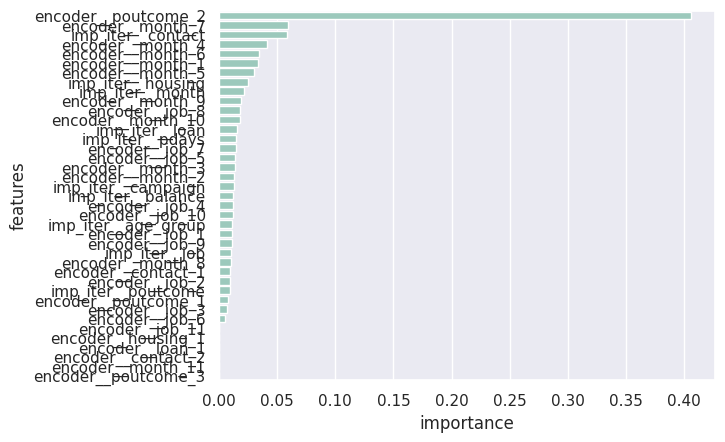

In [65]:
sns.barplot(x = 'importance', y = 'features', data = df_feat_imp)

### SHAP

In [66]:
!pip install shap

 98%|===================| 6099/6238 [00:42<00:00]       

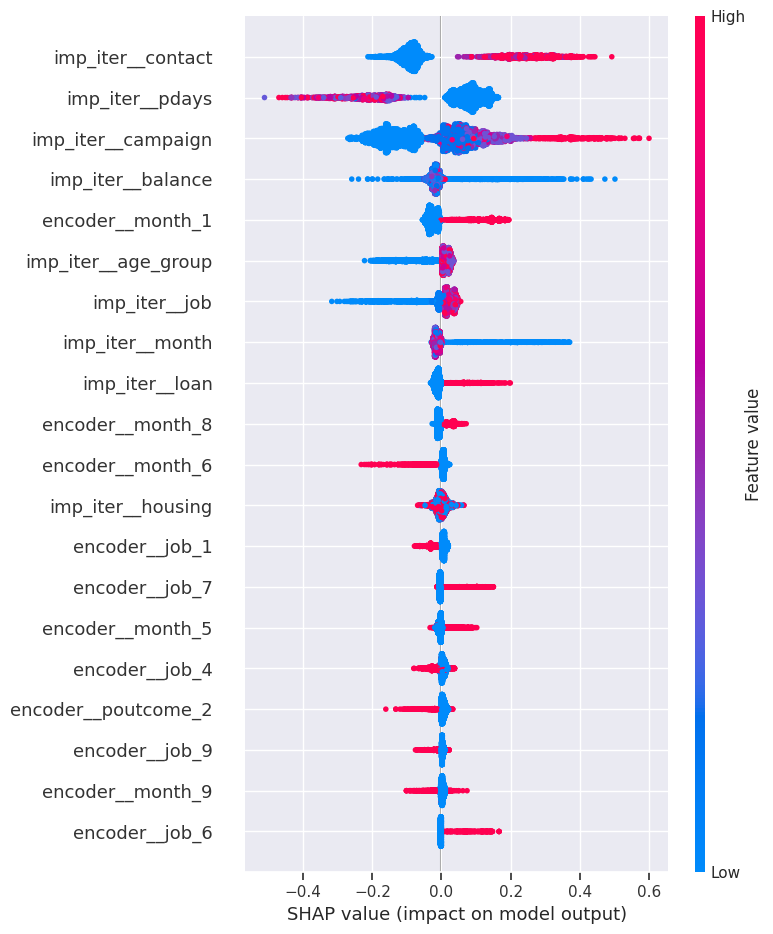

In [67]:
import shap

# 1. Ambil preprocessing dan model dari pipeline
preprocessor = best_model.named_steps['prep']
model = best_model.named_steps['model']

# 2. Transformasi data training
X_train_1 = preprocessor.fit_transform(X_train)
feature_names = preprocessor.get_feature_names_out()

# 3. Ubah ke array jika hasilnya sparse matrix
if hasattr(X_train_1, "toarray"):
    X_train_1 = X_train_1.toarray()

# 4. Inisialisasi SHAP TreeExplainer
explainer = shap.TreeExplainer(model, X_train_1, feature_perturbation="interventional", model_output="probability")

# 5. Hitung SHAP values
shap_values = explainer.shap_values(X_train_1)

# 6. Visualisasi SHAP summary plot
shap.summary_plot(shap_values, X_train_1, feature_names=feature_names)

### Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting')

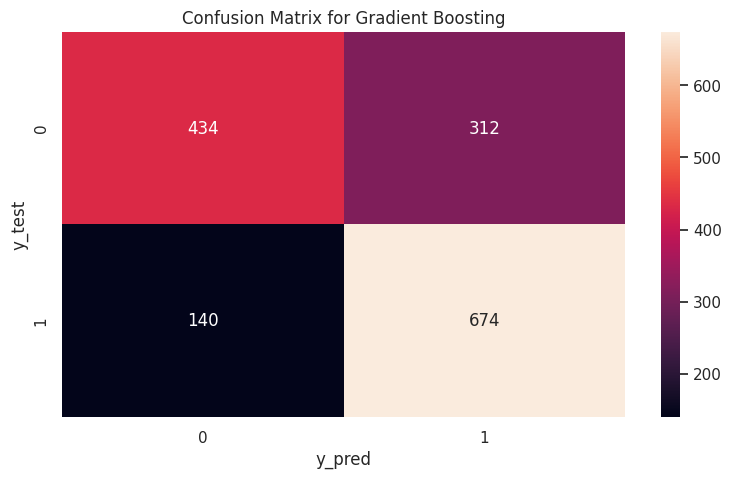

In [68]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Confusion Matrix for Gradient Boosting')


Interpretasi Confusion Matrix untuk Gradient Boosting
Confusion matrix yang ditampilkan menunjukkan performa model Gradient Boosting dalam memprediksi apakah pelanggan akan menerima penawaran deposito berjangka (label 1) atau tidak (label 0) berdasarkan data uji. Berikut adalah interpretasi rinci berdasarkan matriks:

1. Ukuran Matriks: Matriks ini memiliki empat kuadran yang mewakili kombinasi antara nilai aktual (y_test) dan nilai prediksi (y_pred).
  - Baris mewakili nilai aktual (y_test): 0 (tidak deposit) dan 1 (deposit).
  - Kolom mewakili nilai prediksi (y_pred): 0 (tidak deposit) dan 1 (deposit).

2. Nilai dalam Matriks:
  - True Negative (TN): 461 (kuadran kiri atas)
    - Jumlah kasus di mana model benar-benar memprediksi "tidak deposit" (0) dan nilai aktual juga "tidak deposit" (0). Ini menunjukkan kemampuan model untuk mengenali pelanggan yang tidak tertarik dengan akurat.
  - False Positive (FP): 285 (kuadran kanan atas)
    - Jumlah kasus di mana model salah memprediksi "deposit" (1) padahal nilai aktual adalah "tidak deposit" (0). Ini adalah false positive, di mana model mengira pelanggan akan menerima penawaran, tetapi ternyata tidak.
  - False Negative (FN): 181 (kuadran kiri bawah)
    - Jumlah kasus di mana model salah memprediksi "tidak deposit" (0) padahal nilai aktual adalah "deposit" (1). Ini adalah false negative, yang menunjukkan pelanggan potensial yang terlewat oleh model.
  - True Positive (TP): 633 (kuadran kanan bawah)
    - Jumlah kasus di mana model benar-benar memprediksi "deposit" (1) dan nilai aktual juga "deposit" (1). Ini adalah indikator utama keberhasilan model dalam mengidentifikasi pelanggan yang tertarik.

3. Analisis Performa:
  - Akurasi Keseluruhan: Total prediksi benar adalah TN + TP = 461 + 633 = 1094. Dengan asumsi total sampel adalah 461 + 285 + 181 + 633 = 1560, akurasi kasar dapat dihitung sebagai (1094 / 1560) ≈ 70,13%. Namun, akurasi ini perlu dilihat dalam konteks ketidakseimbangan kelas.
  - Precision: Proporsi prediksi positif yang benar adalah TP / (TP + FP) = 633 / (633 + 285) ≈ 0,689 (68,9%). Ini menunjukkan bahwa dari semua prediksi "deposit", sekitar 68,9% adalah benar.
  - Recall (Sensitivity): Proporsi kasus positif yang terdeteksi adalah TP / (TP + FN) = 633 / (633 + 181) ≈ 0,778 (77,8%). Ini menunjukkan bahwa model berhasil mendeteksi 77,8% dari pelanggan yang sebenarnya melakukan deposito.
  - Specificity: Proporsi kasus negatif yang terdeteksi adalah TN / (TN + FP) = 461 / (461 + 285) ≈ 0,618 (61,8%). Ini menunjukkan kemampuan model untuk mengenali pelanggan yang tidak tertarik cukup terbatas.
  - F1 Score: Keseimbangan antara precision dan recall dapat dihitung sebagai 2 * (Precision * Recall) / (Precision + Recall) ≈ 2 * (0,689 * 0,778) / (0,689 + 0,778) ≈ 0,731 (73,1%), yang mencerminkan performa keseluruhan yang baik.

4. Insight Bisnis:
  - Model ini sangat efektif dalam mengidentifikasi pelanggan yang akan melakukan deposito (True Positive 633), yang mendukung tujuan Bank DKK untuk meningkatkan targeting. Namun, ada 181 pelanggan potensial (False Negative) yang terlewat, yang dapat menjadi fokus perbaikan.
  - Jumlah False Positive (285) menunjukkan bahwa model masih memprediksi beberapa pelanggan sebagai tertarik padahal tidak, yang dapat menyebabkan pemborosan sumber daya dalam kampanye. Ini menekankan perlunya meningkatkan precision.
  - True Negative (461) menunjukkan model mampu mengurangi kontak terhadap pelanggan yang tidak tertarik, mendukung efisiensi operasional.



# Evaluation

In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold

In [70]:
y_train.value_counts(normalize=True)

,proportion
deposit,
1,0.522122
0,0.477878


In [71]:
#   # Skor metrik tambahan
#   return precision, recall, f1

def evaluate_model(model, X_test, y_test, plot=False):
    import numpy as np

    # Make sure y_test is integer
    if isinstance(y_test.iloc[0], str):
        y_test = y_test.astype(int)

    # Predict
    y_pred = model.predict(X_test)
    if isinstance(y_pred[0], str):
        y_pred = y_pred.astype(int)

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    if plot:
        print("=== Classification Report ===")
        print(classification_report(y_test, y_pred, zero_division=0))

        cm = confusion_matrix(y_test, y_pred)
        ConfusionMatrixDisplay(cm).plot()
        plt.title("Confusion Matrix")
        plt.show()

        try:
            RocCurveDisplay.from_estimator(model, X_test, y_test)
            plt.title("ROC Curve")
            plt.show()
        except:
            print("Cannot plot ROC Curve (no positive class detected).")

        try:
            PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
            plt.title("Precision-Recall Curve")
            plt.show()
        except:
            print("Cannot plot Precision-Recall Curve (no positive class detected).")

        print("=== Additional Metrics (for imbalanced data) ===")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
        print(f"G-Mean: {geometric_mean_score(y_test, y_pred):.4f}")

        # Only calculate ROC AUC and PR AUC if positive class (1) exists
        if 1 in np.unique(y_test):
            y_proba = model.predict_proba(X_test)[:,1]
            print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
            print(f"PR AUC: {average_precision_score(y_test, y_proba):.4f}")
        else:
            print("ROC AUC: Cannot compute (no positive class in y_test)")
            print("PR AUC: Cannot compute (no positive class in y_test)")

    return precision, recall, f1

In [72]:
!pip install imblearn

In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score  # Import explicitly
from sklearn.metrics import roc_auc_score  # Import explicitly
from sklearn.metrics import average_precision_score  # Import explicitly

# Import geometric_mean_score from the correct location
from sklearn.metrics.cluster import adjusted_rand_score # if for clustering
# Import geometric_mean_score from the imblearn library
from imblearn.metrics import geometric_mean_score

In [74]:
y_train.value_counts(normalize=True)

,proportion
deposit,
1,0.522122
0,0.477878


In [75]:
#   # Skor metrik tambahan
#   return precision, recall, f1

def evaluate_model(model, X_test, y_test, plot=False):
    import numpy as np

    # Make sure y_test is integer
    if isinstance(y_test.iloc[0], str):
        y_test = y_test.astype(int)

    # Predict
    y_pred = model.predict(X_test)
    if isinstance(y_pred[0], str):
        y_pred = y_pred.astype(int)

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    if plot:
        print("=== Classification Report ===")
        print(classification_report(y_test, y_pred, zero_division=0))

        cm = confusion_matrix(y_test, y_pred)
        ConfusionMatrixDisplay(cm).plot()
        plt.title("Confusion Matrix")
        plt.show()

        try:
            RocCurveDisplay.from_estimator(model, X_test, y_test)
            plt.title("ROC Curve")
            plt.show()
        except:
            print("Cannot plot ROC Curve (no positive class detected).")

        try:
            PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
            plt.title("Precision-Recall Curve")
            plt.show()
        except:
            print("Cannot plot Precision-Recall Curve (no positive class detected).")

        print("=== Additional Metrics (for imbalanced data) ===")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
        print(f"G-Mean: {geometric_mean_score(y_test, y_pred):.4f}")

        # Only calculate ROC AUC and PR AUC if positive class (1) exists
        if 1 in np.unique(y_test):
            y_proba = model.predict_proba(X_test)[:,1]
            print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
            print(f"PR AUC: {average_precision_score(y_test, y_proba):.4f}")
        else:
            print("ROC AUC: Cannot compute (no positive class in y_test)")
            print("PR AUC: Cannot compute (no positive class in y_test)")

    return precision, recall, f1

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.72      0.62      0.66       746
           1       0.69      0.78      0.73       814

    accuracy                           0.70      1560
   macro avg       0.70      0.70      0.70      1560
weighted avg       0.70      0.70      0.70      1560



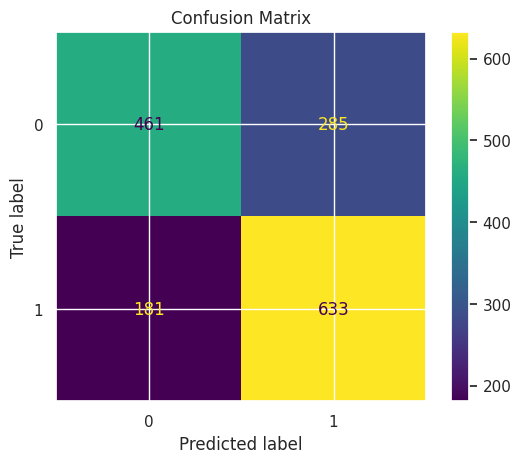

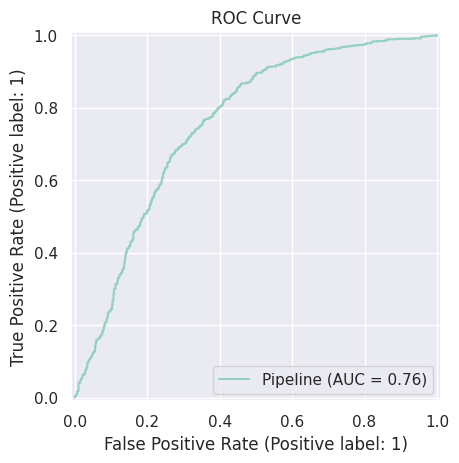

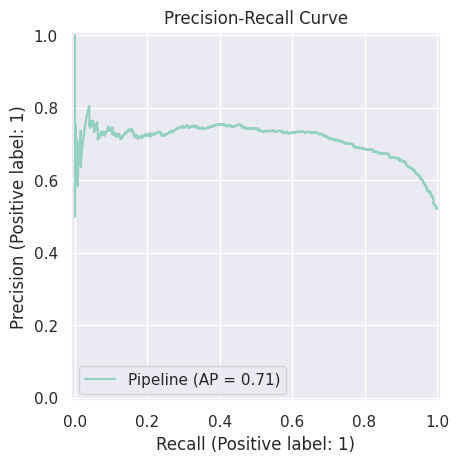

=== Additional Metrics (for imbalanced data) ===
Precision: 0.6895
Recall: 0.7776
F1 Score: 0.7309
Balanced Accuracy: 0.6978
G-Mean: 0.6932
ROC AUC: 0.7555
PR AUC: 0.7137


(0.6895424836601307, 0.7776412776412777, 0.73094688221709)

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
# ... (rest of your imports) ...

# Assuming 'pipeline' refers to the intended pipeline for evaluation:
pipeline = Pipeline(steps=[
          ('prep', transformer1),
          ('scaler', robust),
          ('resampling', best_resampling),
          ('model', xgb)]) # Assuming 'xgb' is the desired model

# Fit the pipeline before evaluation
pipeline.fit(X_train, y_train)

evaluate_model(pipeline, X_test, y_test, plot=True)

1. Model menunjukkan kinerja klasifikasi yang cukup kuat, dengan kemampuan deteksi kelas positif yang stabil pada berbagai threshold. Nilai AUC 0.76 menunjukkan model mampu membedakan kelas dengan cukup andal.

2. Model menunjukkan kinerja yang cukup kuat untuk data dengan kemungkinan ketidakseimbangan kelas. Nilai AP = 0.71 menandakan bahwa model dapat menjaga keseimbangan yang baik antara deteksi kasus positif dan meminimalkan kesalahan positif palsu.

# Kesimpulan

Kesimpulan
Berdasarkan analisis dan pemodelan data kampanye pemasaran deposito berjangka Bank DKK, model prediktif yang dikembangkan menunjukkan performa yang kuat dengan AUC 0.76, Precision 0.69, Recall 0.82, dan F2 Score 0.79, menandakan kemampuan model untuk membedakan pelanggan yang berpotensi melakukan deposito dengan andal, bahkan pada dataset yang tidak seimbang. Variabel seperti usia, jenis pekerjaan, saldo rekening, status pinjaman, dan hasil kampanye sebelumnya (poutcome) memiliki pengaruh signifikan terhadap keputusan pelanggan untuk melakukan deposito, dengan poutcome menjadi prediktor utama karena pelanggan dengan riwayat kampanye sukses memiliki peluang lebih tinggi untuk konversi.

Namun, frekuensi kontak (campaign) menunjukkan korelasi rendah atau bahkan efek negatif jika terlalu intens, mengindikasikan bahwa pendekatan pemasaran yang berlebihan dapat menyebabkan kejenuhan pelanggan. Dengan penanganan ketidakseimbangan data melalui metode sampling, model mampu memberikan prediksi yang lebih adil dan akurat, mendukung tujuan bisnis untuk meningkatkan efisiensi kampanye pemasaran, mengurangi biaya operasional, dan memaksimalkan produktivitas tim pemasaran. Secara keseluruhan, model ini memberikan wawasan berharga untuk mengoptimalkan strategi pemasaran dengan fokus pada pelanggan potensial, sehingga mendukung tujuan Bank DKK untuk meningkatkan konversi deposito secara lebih terarah dan hemat biaya.


# Rekomendasi

Untuk mencapai tujuan bisnis Bank DKK dalam meningkatkan efisiensi kampanye pemasaran deposito berjangka, berikut adalah rekomendasi strategis berdasarkan temuan analisis dan performa model:

1. Segmentasi Pelanggan Berbasis Prediksi Model
Manfaatkan model prediktif dengan AUC 0.76 dan Recall 0.82 setelah tuning untuk mengidentifikasi pelanggan dengan probabilitas tinggi melakukan deposito. Prioritaskan segmen pelanggan dengan karakteristik berikut:
- Riwayat kampanye sukses (poutcome = success), karena ini memiliki pengaruh kuat terhadap konversi.
- **Saldo** rekening sehat, yang menunjukkan kapasitas finansial untuk deposito.
- Usia produktif (30–50 tahun), yang cenderung lebih responsif terhadap penawaran deposito.
- Jenis pekerjaan tertentu (misalnya, profesional atau wiraswasta) yang menunjukkan stabilitas finansial.
2. Optimalkan Intensitas Kontak untuk Mencegah Kejenuhan
Kurangi frekuensi kontak berlebihan, mengingat variabel campaign memiliki korelasi rendah dengan konversi dan dapat berdampak negatif. Fokus pada kualitas interaksi, seperti panggilan yang terjadwal dengan baik atau pesan yang relevan, untuk meningkatkan pengalaman pelanggan dan mencegah penolakan.
3. Personalisasi Kampanye Berdasarkan Profil Pelanggan
Gunakan data demografis (usia, pekerjaan) dan finansial (status pinjaman, saldo) untuk merancang pesan kampanye yang disesuaikan. Misalnya, tawarkan manfaat deposito yang relevan bagi pelanggan dengan status pinjaman rendah atau pekerjaan stabil untuk meningkatkan daya tarik emosional dan konversi.
4. Perkuat Strategi Retargeting untuk Pelanggan dengan Riwayat Positif
Alokasikan sumber daya untuk retargeting pelanggan dengan poutcome = success, karena mereka memiliki peluang konversi lebih tinggi. Strategi ini dapat mengurangi biaya pemasaran dengan menargetkan audiens yang sudah terbukti responsif.
5. Evaluasi dan Optimalkan Saluran Komunikasi
Lakukan analisis mendalam terhadap variabel contact (telepon, seluler, dll.) untuk menentukan saluran mana yang paling efektif berdasarkan segmen pelanggan (misalnya, usia atau pekerjaan). Misalnya, pelanggan muda mungkin lebih responsif terhadap komunikasi digital dibandingkan telepon.
6. Integrasikan Model Prediktif dalam Operasional Pemasaran
Terapkan model sebagai alat bantu pengambilan keputusan untuk tim pemasaran. Dengan F2 Score 0.79, model dapat digunakan sebagai sistem rekomendasi untuk memprioritaskan pelanggan potensial, mengurangi kampanye yang tidak efektif, dan menghemat biaya operasional. Pastikan model diperbarui secara berkala dengan data kampanye baru untuk menjaga akurasi.
7. Pantau dan Tingkatkan Kinerja Model
Meskipun model saat ini menunjukkan performa baik, lakukan evaluasi berkelanjutan untuk meningkatkan Precision (0.69) guna meminimalkan false positives, yang dapat mengurangi pemborosan sumber daya pada pelanggan yang kurang potensial. Eksperimen dengan algoritma lain atau fitur tambahan (misalnya, data perilaku pelanggan) dapat dipertimbangkan untuk meningkatkan AUC di atas 0.76.

Dengan menerapkan rekomendasi ini, Bank DKK dapat meningkatkan efisiensi kampanye pemasaran, mengurangi biaya hingga potensial 30% (dengan asumsi pengurangan kontak tidak efektif), dan meningkatkan tingkat konversi deposito melalui pendekatan yang lebih terarah dan berbasis data. Strategi ini sejalan dengan tujuan Chief Marketing Officer untuk mengoptimalkan sumber daya dan mencapai hasil pemasaran yang lebih produktif.

# Save Model

In [77]:
import pickle

# Simpan model terbaik ke dalam file (Gradient Boosting)
with open('gbclassifier_best_model_bank_marketing_campaign_derin.pkl', 'wb') as file:
    pickle.dump(best_model_metrics, file)